In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/projet-data-RTE/clean-dataset-RTE.csv'

# Import de librairies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from scipy.stats import chi2_contingency,pearsonr

## charger le dataset

In [5]:
df = pd.read_csv(path, sep=';')

In [6]:
# afficher les 5 premieres lignes
df.head()

timestamp  consommation_MW  production_MW  Q_total_MVAR  \
0  2025-07-22T00:00:00            50000          50334          1529   
1  2025-07-22T00:01:00            50034          50470          1641   
2  2025-07-22T00:02:00            50069          50652          2238   
3  2025-07-22T00:03:00            50104          50492          1620   
4  2025-07-22T00:04:00            50139          50475          2185   

   S_total_MVA  cos_phi  frequence_Hz  T1_P_MW  T1_Q_MVAR  T1_I_A  T2_P_MW  \
0        50023    1.000         49.95   250.68      36.85   605.0   195.14   
1        50061    0.999         49.98   250.10      63.09   559.3   191.82   
2        50119    0.999         50.04   236.72      47.23   639.6   193.27   
3        50130    0.999         50.03   194.07      43.28   544.3   153.17   
4        50187    0.999         50.00   189.04      37.46   438.9   182.89   

   T2_Q_MVAR  T2_I_A  etat_reseau  nb_lignes_HT zone_reseau jour_type  
0      47.19   645.0            0             4        Nord    ouvr√©e  
1      45.35   421.4            0             5         Est    ouvr√©e  
2      37.77   439.6            0             3         Est    ouvr√©e  
3      23.24   418.6            0             3         Sud    ouvr√©e  
4      35.07   462.6            0             2         Sud    ouvr√©e

## quelques infos sur le dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        1440 non-null   object 
 1   consommation_MW  1440 non-null   int64  
 2   production_MW    1440 non-null   int64  
 3   Q_total_MVAR     1440 non-null   int64  
 4   S_total_MVA      1440 non-null   int64  
 5   cos_phi          1440 non-null   float64
 6   frequence_Hz     1440 non-null   float64
 7   T1_P_MW          1440 non-null   float64
 8   T1_Q_MVAR        1440 non-null   float64
 9   T1_I_A           1440 non-null   float64
 10  T2_P_MW          1440 non-null   float64
 11  T2_Q_MVAR        1440 non-null   float64
 12  T2_I_A           1440 non-null   float64
 13  etat_reseau      1440 non-null   int64  
 14  nb_lignes_HT     1440 non-null   int64  
 15  zone_reseau      1440 non-null   object 
 16  jour_type        1440 non-null   object 
dtypes: float64(8),

**On a un dataset de donnees de poste HTA/BT avec 1440 entr√©es et de 17 colonnes** qui sont:

| Variable              | Signification                                                                 |
| --------------------- | ----------------------------------------------------------------------------- |
| **`timestamp`**       | Date et heure de la mesure (format ISO `YYYY-MM-DDTHH:MM:SS`)                 |
| **`consommation_MW`** | Consommation totale du r√©seau √† cet instant (en m√©gawatts)                    |
| **`production_MW`**   | Production totale inject√©e sur le r√©seau √† cet instant (en m√©gawatts)         |
| **`Q_total_MVAR`**    | Puissance r√©active totale sur le r√©seau (en MVAR : m√©gavolt-amp√®res r√©actifs) |
| **`S_total_MVA`**     | Puissance apparente totale sur le r√©seau (en MVA : m√©gavolt-amp√®res)          |
| **`cos_phi`**         | Facteur de puissance du r√©seau (`cos(œÜ)`, compris entre 0 et 1)               |
| **`frequence_Hz`**    | Fr√©quence instantan√©e du r√©seau (en hertz, normalement proche de 50 Hz)       |
| **`T1_P_MW`**         | Puissance active mesur√©e sur la ligne ou transformateur T1 (en MW)            |
| **`T1_Q_MVAR`**       | Puissance r√©active mesur√©e sur T1 (en MVAR)                                   |
| **`T1_I_A`**          | Courant mesur√© sur T1 (en amp√®res)                                            |
| **`T2_P_MW`**         | Puissance active mesur√©e sur la ligne ou transformateur T2 (en MW)            |
| **`T2_Q_MVAR`**       | Puissance r√©active mesur√©e sur T2 (en MVAR)                                   |
| **`T2_I_A`**          | Courant mesur√© sur T2 (en amp√®res)                                            |
| **`etat_reseau`**     | Code d‚Äô√©tat du r√©seau (par exemple : 0 = normal, 1 = alerte‚Ä¶)                 |
| **`nb_lignes_HT`**    | Nombre de lignes haute tension actives √† cet instant                          |
| **`zone_reseau`**     | Zone g√©ographique du r√©seau (Nord, Sud, Est‚Ä¶)                                 |
| **`jour_type`**       | Type de jour (ouvr√©, week-end, jour f√©ri√©‚Ä¶)                                   |


In [8]:
# chercher la cardinalite de chaque variable
df.nunique()

timestamp          1440
consommation_MW    1413
production_MW      1366
Q_total_MVAR        947
S_total_MVA        1347
cos_phi               5
frequence_Hz         20
T1_P_MW            1339
T1_Q_MVAR          1185
T1_I_A             1174
T2_P_MW            1339
T2_Q_MVAR          1197
T2_I_A             1184
etat_reseau           3
nb_lignes_HT          4
zone_reseau           5
jour_type             1
dtype: int64

## separation en variable discretes et continues

Variables continues:
- `timestamp`,`consommation_MW`,`production_MW`,`cos_phi`, `frequence_Hz`, `T1_P_MW`, `T1_Q_MVAR`, `T1_I_A`, `T2_P_MW`,`T2_Q_MVAR`, `T2_I_A`,`Q_total_MVAR`,`S_total_MVA`

Variables discretes:
- `etat_reseau`,`nb_lignes_HT`,`zone_reseau`, `jour_type`


# Analyse univariee

## Analyse variables discr√®tes

### cos_phi

In [9]:
df['cos_phi'].value_counts(normalize='true')

cos_phi
0.999    0.736806
1.000    0.182639
0.998    0.078472
0.997    0.001389
0.996    0.000694
Name: proportion, dtype: float64

Text(0.5, 1.0, 'diagramme en barres cos phi')

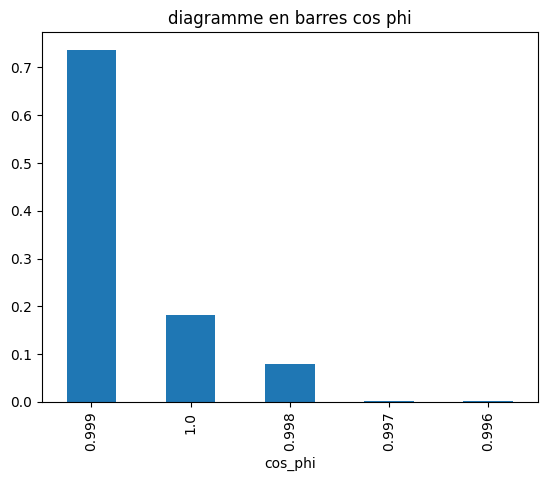

In [10]:
df['cos_phi'].value_counts(normalize='true').plot(kind='bar')
plt.title("diagramme en barres cos phi")

### Analyse:

Le facteur de puissance, ou cos(œÜ), mesure la proportion d‚Äô√©nergie effectivement utilis√©e (puissance active) par rapport √† l‚Äô√©nergie fournie (apparente). Un facteur de puissance proche de 1 est souhaitable : il signifie que l‚Äô√©nergie d√©livr√©e par le r√©seau est utilis√©e efficacement.

- R√©partition observ√©e :
0.999 repr√©sente ~74 % des cas.

1.000 repr√©sente ~18 %, ce qui peut √™tre d√ª √† un arrondi ou √† des conditions de charge purement r√©sistive (id√©al mais rare).

Les autres valeurs (< 0.998) sont ultra-minoritaires (moins de 1 %), ce qui est excellent.

- Lecture du diagramme en barres :
La forte concentration autour de 0.999 t√©moigne d‚Äôun r√©seau tr√®s bien compens√©, avec une efficacit√© √©nerg√©tique optimale.

L'absence de valeurs basses (< 0.95 ou 0.90) confirme qu‚Äôil n‚Äôy a pas de surcharge en √©nergie r√©active dans le syst√®me, ce qui soulage les transformateurs et lignes haute tension

### etat_reseau

In [11]:
df['etat_reseau'].value_counts(normalize='true')

etat_reseau
0    0.989583
1    0.005556
2    0.004861
Name: proportion, dtype: float64

Text(0.5, 1.0, 'diagramme en barre etat du reseau')

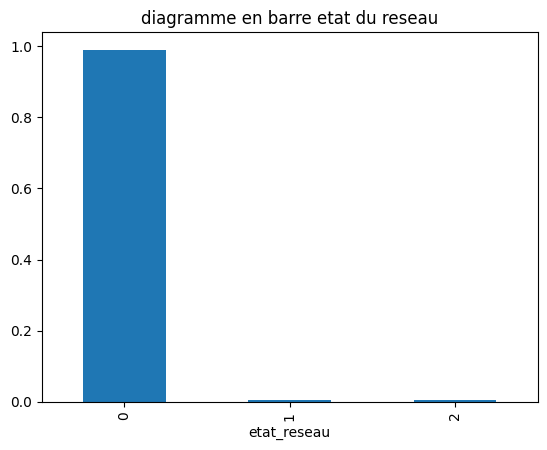

In [12]:
df['etat_reseau'].value_counts(normalize='true').plot(kind='bar')
plt.title("diagramme en barre etat du reseau")

### analyse:

On voit que 98% de l'etat r√©seau est au statut 0 qui veut dire que le reseau est majoritairement dans un fonctionnement en √©tat optimal

### nb_lignes_HT

In [13]:
df['nb_lignes_HT'].value_counts(normalize='true')

nb_lignes_HT
4    0.315972
3    0.275694
5    0.213889
2    0.194444
Name: proportion, dtype: float64

Text(0.5, 1.0, 'diagramme en barres nb lignes HT')

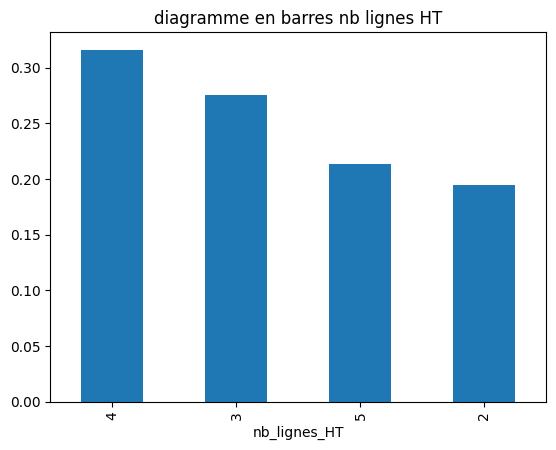

In [14]:
df['nb_lignes_HT'].value_counts(normalize='true').plot(kind='bar')
plt.title("diagramme en barres nb lignes HT")

### Analyse
Durant la journ√©e, seules 4 lignes HT ont √©t√© actives/utils√©es durant 32% du temps, 3 lignes HT durant 28% du temps, 5 lignes HT durant 21% du temps et 2 lignes durant 19% du temps

### zone_reseau

In [15]:
df['zone_reseau'].value_counts(normalize='true')

zone_reseau
Est       0.212500
Ouest     0.209028
Centre    0.202083
Sud       0.201389
Nord      0.175000
Name: proportion, dtype: float64

Text(0.5, 1.0, 'diagramme en barres zone reseau')

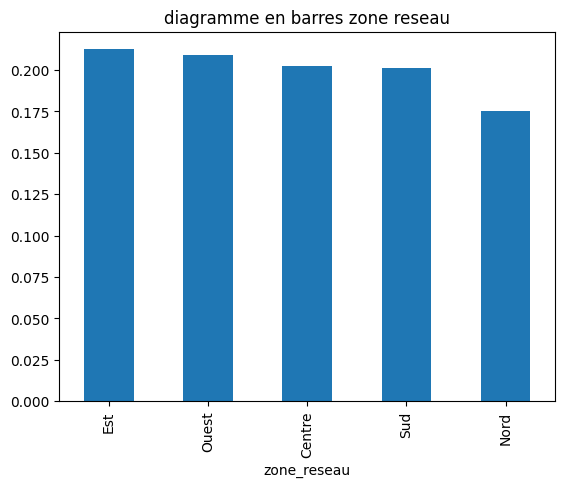

In [16]:
df['zone_reseau'].value_counts(normalize='true').plot(kind='bar')
plt.title("diagramme en barres zone reseau")

### Analyse:

On voit que presques toutes les zones ont sensiblement les m√™mes proportion en couverture r√©seau

### jour_type

In [17]:
df['jour_type'].value_counts(normalize='true')

jour_type
ouvr√©e    1.0
Name: proportion, dtype: float64

Text(0.5, 1.0, 'diagramme en barres jour type')

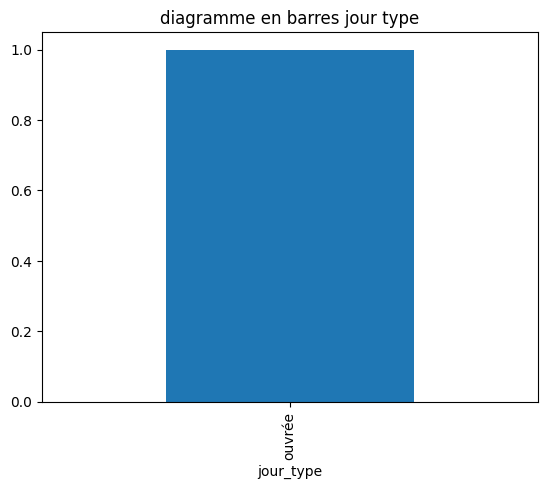

In [18]:
df['jour_type'].value_counts(normalize='true').plot(kind='bar')
plt.title("diagramme en barres jour type")

### Analyse:
Toutes les prises de metriques ont ete realisees en jour ouvr√©e

## Analyse variables continues

### timestamp

In [19]:
df['timestamp']

0       2025-07-22T00:00:00
1       2025-07-22T00:01:00
2       2025-07-22T00:02:00
3       2025-07-22T00:03:00
4       2025-07-22T00:04:00
               ...         
1435    2025-07-22T23:55:00
1436    2025-07-22T23:56:00
1437    2025-07-22T23:57:00
1438    2025-07-22T23:58:00
1439    2025-07-22T23:59:00
Name: timestamp, Length: 1440, dtype: object

In [20]:
min_time = df['timestamp'].min()
max_time = df['timestamp'].max()

print(f"debut heure : {min_time}")
print(f"fin heure : {max_time}")

debut heure : 2025-07-22T00:00:00
fin heure : 2025-07-22T23:59:00


### Analyse

`timestamp` est l'horodotage de la prise de metrique et l'heure de date de debut de prise est `2025-07-22T00:00:00` et celle de fin est de `2025-07-22T23:59:00` et la prise se fait par pas de `1 minute`

### consommation_MW

In [21]:
df['consommation_MW'].describe()

count     1440.000000
mean     49913.934028
std       5766.486351
min      33322.000000
25%      44202.000000
50%      50000.000000
75%      55650.000000
max      57999.000000
Name: consommation_MW, dtype: float64

In [22]:


def plot_hist_box(df: DataFrame, col: str):
    """Plot the histogram and boxplot of a variable on the same figure"""

    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

    sns.histplot(x=df[col], ax=ax[0])
    sns.boxplot(x=df[col], ax=ax[1])

    ax[0].set_title(f"Histogramme et boxplot de '{col}'")

    plt.show()


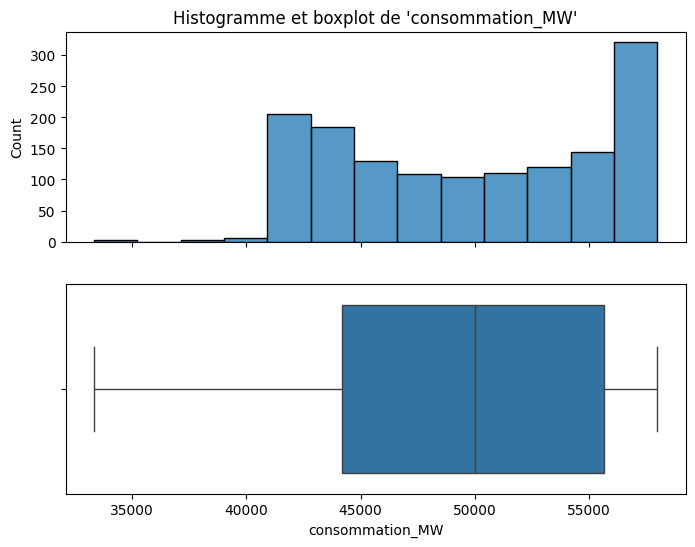

In [23]:
plot_hist_box(df, 'consommation_MW')

### Analyse
L‚Äôanalyse statistique de la variable `consommation_MW` r√©v√®le une consommation moyenne d‚Äôenviron 49‚ÄØ913 MW, avec une m√©diane quasi √©quivalente (50‚ÄØ000 MW), t√©moignant d‚Äôune distribution globalement √©quilibr√©e autour de cette valeur centrale. L‚Äô√©cart-type relativement √©lev√© (~5‚ÄØ766 MW) met en √©vidence une variabilit√© structurelle importante, li√©e aux fluctuations naturelles de la demande √©lectrique.

Le boxplot montre une dispersion marqu√©e, sans valeurs aberrantes significatives, ce qui confirme la stabilit√© du r√©seau et l‚Äôabsence d‚Äôanomalies majeures sur la p√©riode analys√©e. L‚Äôhistogramme met en lumi√®re une fr√©quence accrue des valeurs √©lev√©es, notamment autour de 55‚ÄØ000 √† 58‚ÄØ000 MW, sugg√©rant des pics de consommation r√©currents.

Ces r√©sultats traduisent une consommation fortement influenc√©e par des ph√©nom√®nes cycliques (heures de la journ√©e, jours de la semaine, saisonnalit√©) plut√¥t que par des √©v√©nements ponctuels. L‚Äôensemble t√©moigne d‚Äôun r√©seau robuste, r√©pondant √† une demande stable mais sujette √† des pics pr√©visibles.



### production_MW

In [24]:
df['production_MW'].describe()

count     1440.000000
mean     50563.127778
std       5649.607665
min      42113.000000
25%      44898.750000
50%      50683.500000
75%      56122.250000
max      58882.000000
Name: production_MW, dtype: float64

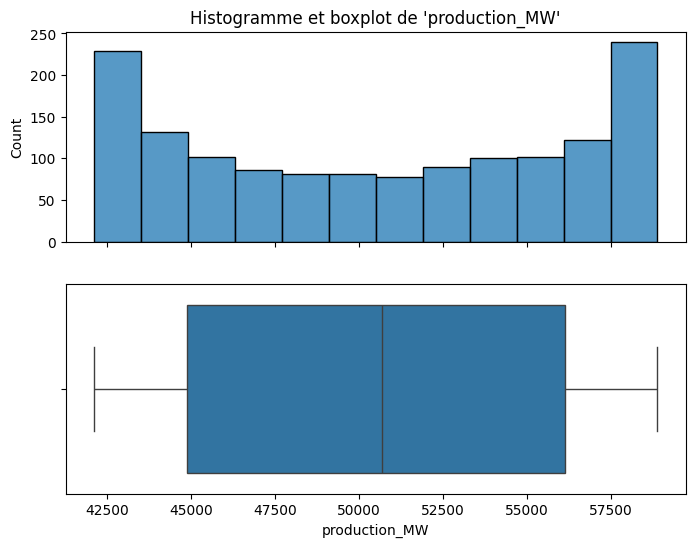

In [25]:
plot_hist_box(df, 'production_MW')

### Analyse:
L‚Äôanalyse statistique de la production √©lectrique sur la p√©riode consid√©r√©e met en √©vidence une valeur moyenne de 50‚ÄØ563 MW, tr√®s proche de la m√©diane (50‚ÄØ683 MW). Cette proximit√© indique un bon √©quilibre structurel de la production, conforme aux objectifs de r√©gulation en temps r√©el du r√©seau.

L‚Äô√©cart-type de 5‚ÄØ650 MW traduit une variabilit√© ma√Ætris√©e, coh√©rente avec les fluctuations naturelles de la demande et l‚Äôajustement dynamique des moyens de production (notamment pilotables). Le minimum observ√© de 42‚ÄØ113 MW sugg√®re des phases creuses (probablement nocturnes ou en p√©riode de faible demande), tandis que le maximum de 58‚ÄØ882 MW refl√®te des p√©riodes de forte sollicitation du parc de production.

L‚Äôhistogramme pr√©sente une bimodalit√© claire, indiquant deux r√©gimes de fonctionnement du syst√®me √©lectrique : un r√©gime bas, vraisemblablement li√© aux heures creuses, et un r√©gime haut, correspondant aux pointes journali√®res (matin√©es ou soir√©es hivernales typiquement). Ce comportement est classique sur les r√©seaux fortement corr√©l√©s √† la consommation r√©sidentielle et aux conditions climatiques.

Le boxplot montre une r√©partition √©tendue mais sans outliers apparents, confirmant un pilotage efficace de la production, sans instabilit√© marqu√©e ni d√©rive inhabituelle.

### frequence_Hz

In [26]:
df['frequence_Hz'].unique()

array([49.95, 49.98, 50.04, 50.03, 50.  , 50.01, 49.99, 50.05, 49.94,
       49.97, 50.02, 49.92, 50.07, 49.93, 49.91, 50.06, 49.96, 49.9 ,
       50.08, 50.09])

In [27]:
df['frequence_Hz'].describe()

count    1440.000000
mean       49.998646
std         0.029849
min        49.900000
25%        49.980000
50%        50.000000
75%        50.020000
max        50.090000
Name: frequence_Hz, dtype: float64

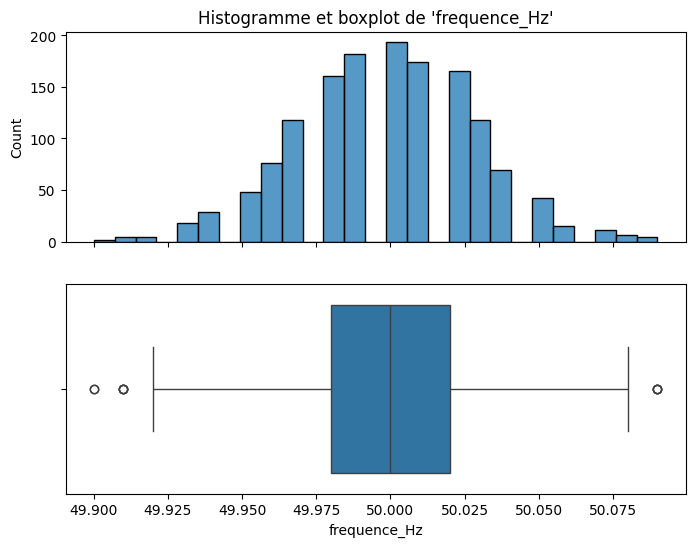

In [28]:
plot_hist_box(df, 'frequence_Hz')

### Analyse:
La fr√©quence moyenne mesur√©e est de 49,998 Hz, avec une m√©diane parfaitement centr√©e √† 50 Hz. L‚Äô√©cart-type extr√™mement faible (~0,03 Hz) t√©moigne d‚Äôune tr√®s grande stabilit√© fr√©quentielle, essentielle pour la s√©curit√© du syst√®me √©lectrique.

L‚Äôhistogramme pr√©sente une distribution sym√©trique en cloche centr√©e sur 50 Hz, caract√©ristique d‚Äôun r√©seau bien √©quilibr√©. Le boxplot r√©v√®le quelques rares √©carts, mais tous restent contenus dans les marges de tol√©rance du r√©seau interconnect√© europ√©en (¬±1 %), sans signal critique.

#### conclusion:
Le syst√®me op√©r√© affiche un excellent pilotage de la fr√©quence, assurant la stabilit√© de l‚Äôensemble du r√©seau malgr√© les variations naturelles de la consommation et de la production. Ces r√©sultats confirment une exploitation efficace, sans signe de d√©s√©quilibre ou de d√©rive significative.


### T1_P_MW

In [29]:
df['T1_P_MW'].describe()

count    1440.000000
mean      198.819458
std        31.021255
min       113.010000
25%       177.372500
50%       198.545000
75%       220.500000
max       305.870000
Name: T1_P_MW, dtype: float64

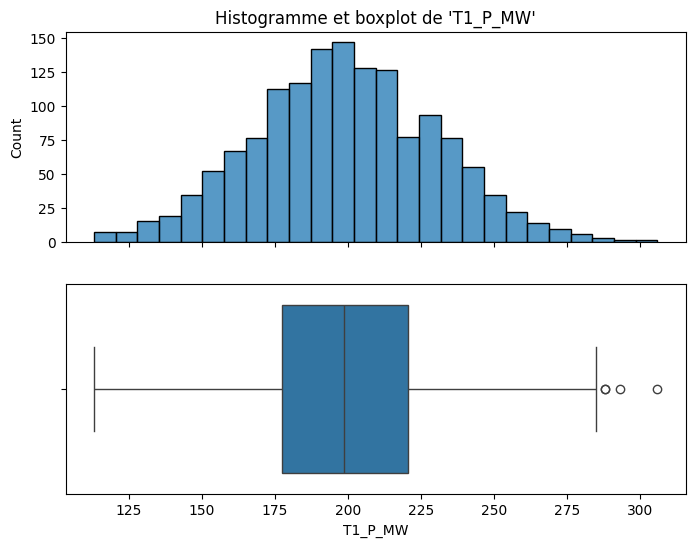

In [30]:
plot_hist_box(df, 'T1_P_MW')

### Analyse
La puissance active T1_P_MW pr√©sente une moyenne de 198,8 MW et une m√©diane de 198,5 MW, ce qui indique une distribution tr√®s √©quilibr√©e autour de sa valeur centrale. L‚Äô√©cart-type de 31 MW refl√®te une variabilit√© mod√©r√©e, compatible avec un poste ou une ligne soumise √† des variations cycliques de charge.

L‚Äôhistogramme r√©v√®le une distribution l√©g√®rement asym√©trique vers la droite, avec une forte concentration entre 175 MW et 225 MW, typique d‚Äôun comportement de charge quotidien r√©gulier. Quelques valeurs hautes (>275 MW) sont identifi√©es comme outliers, mais elles restent rares.

Le boxplot confirme une bonne stabilit√© op√©rationnelle, avec des √©carts majoritairement contenus dans l‚Äôintervalle interquartile [177,3 ‚Äì 220,5 MW], ce qui refl√®te un fonctionnement globalement ma√Ætris√©.

#### conclusion:
T1_P_MW √©volue dans une plage stable, avec un profil quasi-normal autour de 200 MW. Les rares d√©passements observ√©s au-del√† de 275 MW restent ponctuels et ne traduisent pas de d√©s√©quilibre structurel. Ce poste ou tron√ßon semble exploit√© dans des conditions nominales, sans surcharge persistante ni tension op√©rationnelle anormale.

### T1_Q_MVAR

In [31]:
df['T1_Q_MVAR'].describe()

count    1440.000000
mean       50.150132
std        10.488622
min        11.630000
25%        43.375000
50%        50.000000
75%        57.305000
max        83.770000
Name: T1_Q_MVAR, dtype: float64

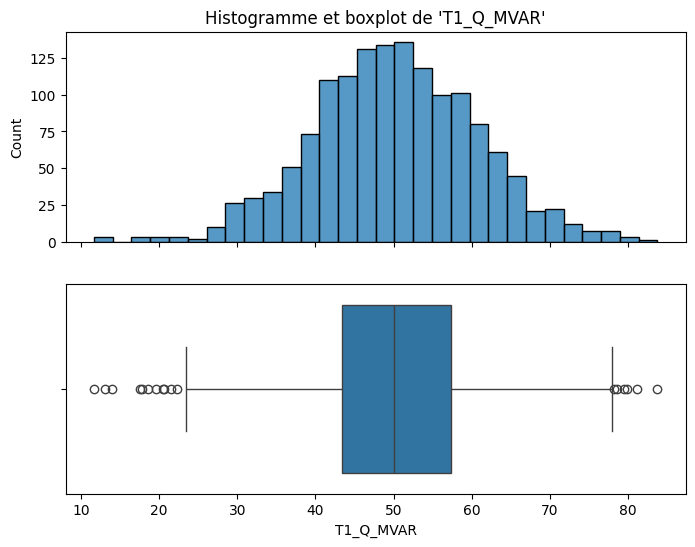

In [32]:
plot_hist_box(df, 'T1_Q_MVAR')

### Analyse:

La variable T1_Q_MVAR affiche une moyenne de 50,15 MVAR et une m√©diane tr√®s proche (50,00 MVAR), ce qui traduit une distribution bien centr√©e et √©quilibr√©e. L‚Äô√©cart-type (~10,5 MVAR) refl√®te une variabilit√© ma√Ætris√©e, sans instabilit√© significative.

L‚Äôhistogramme pr√©sente une courbe sym√©trique en forme de cloche autour de 50 MVAR, typique d‚Äôun fonctionnement en r√©gime stable avec une r√©gulation automatique efficace de la compensation r√©active (pilotage du cos œÜ).

Le boxplot r√©v√®le quelques valeurs atypiques :

Vers le bas (<30 MVAR), probablement li√©es √† des p√©riodes de faible charge ou √† un r√©glage temporaire de compensation.

Vers le haut (>75 MVAR), pouvant correspondre √† des appels r√©actifs ponctuels ou √† des pics de tension n√©cessitant injection de MVAR.

#### conclusion:

Le comportement de la puissance r√©active T1_Q_MVAR est globalement stable et √©quilibr√©, avec des pointes mod√©r√©es. La r√©gulation locale ou distante semble efficace, permettant de maintenir un bon facteur de puissance et une tension r√©seau stable. Les outliers identifi√©s restent op√©rationnellement acceptables, √† surveiller seulement si r√©currents ou crois√©s avec un √©tat r√©seau "tendu".

### T1_I_A

In [33]:
df['T1_I_A'].describe()

count    1440.000000
mean      504.424375
std       101.293804
min       236.000000
25%       435.100000
50%       496.600000
75%       564.425000
max      1129.700000
Name: T1_I_A, dtype: float64

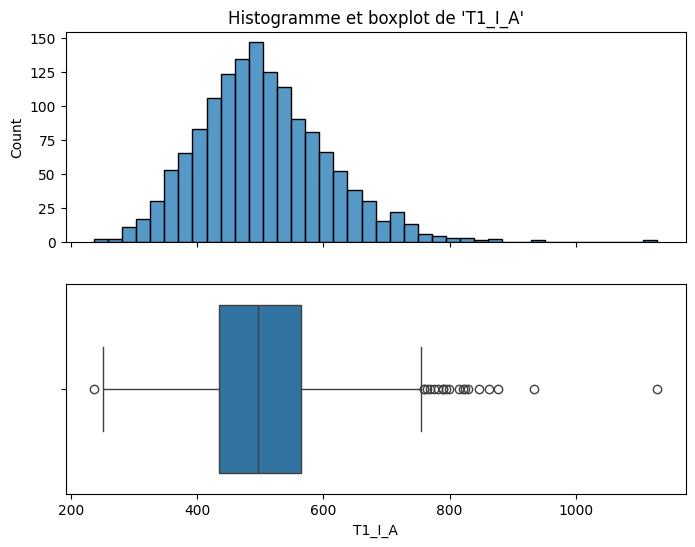

In [34]:
plot_hist_box(df, 'T1_I_A')

### Analyse

La moyenne du courant mesur√© est de 504 A, avec une m√©diane proche (496 A), ce qui indique une distribution centr√©e. L‚Äô√©cart-type √©lev√© (101 A) refl√®te une variabilit√© significative mais attendue dans un contexte de flux √©nerg√©tique dynamique.

L‚Äôhistogramme suit une distribution gaussienne l√©g√®rement asym√©trique, avec un pic autour de 500 A. Cela traduit une activit√© r√©guli√®re du poste, probablement li√©e √† un profil de consommation classique (alternance jour/nuit, cycles industriels, etc.).

Le boxplot met en √©vidence :

Une large concentration entre 435 A (Q1) et 564 A (Q3), zone de fonctionnement nominal.

Des outliers nombreux au-del√† de 700 A, jusqu‚Äô√† un maximum de 1‚ÄØ129 A, qui peuvent signaler :

des pics de charge ponctuels (transferts massifs, d√©marrages industriels),

ou des ph√©nom√®nes de transit transitoires, √† surveiller si r√©currents.

#### Conclusion

Le courant sur le tron√ßon T1 est globalement stable, centr√© autour de 500 A. Les valeurs extr√™mes restent majoritairement tol√©rables mais devront √™tre analys√©es en lien avec la temp√©rature des c√¢bles, les seuils de d√©clenchement des protections, ou l‚Äô√©tat r√©seau. Une surveillance cibl√©e des pointes au-del√† de 850 A peut √™tre recommand√©e.

### T2_P_MW

In [35]:
df['T2_P_MW'].describe()

count    1440.000000
mean      179.449771
std        24.291419
min        95.610000
25%       163.030000
50%       179.175000
75%       196.117500
max       252.850000
Name: T2_P_MW, dtype: float64

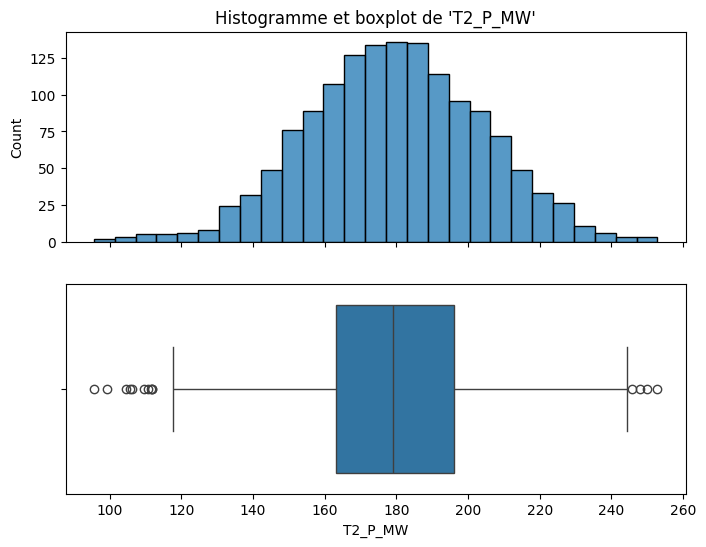

In [36]:
plot_hist_box(df, 'T2_P_MW')

### Analyse
La puissance active mesur√©e sur le tron√ßon T2 affiche une moyenne de 179,45 MW et une m√©diane tr√®s proche (179,18 MW), confirmant une distribution parfaitement centr√©e et un comportement stable du flux √©nerg√©tique.

L‚Äô√©cart-type mod√©r√© (24,29 MW) traduit une variabilit√© ma√Ætris√©e, en coh√©rence avec les fluctuations normales de charge. La distribution suit une forme quasi-gaussienne, avec une l√©g√®re asym√©trie droite li√©e √† quelques pics rares au-del√† de 240 MW.

Le boxplot r√©v√®le un fonctionnement concentr√© entre 163 et 196 MW (zone interquartile), sans signe de surcharge durable. Les valeurs extr√™mes restent occasionnelles, sans menace structurelle identifi√©e.

#### conclusion:
T2_P_MW refl√®te une exploitation fluide, stable et ma√Ætris√©e du tron√ßon. Le profil observ√© ne pr√©sente ni saturation, ni d√©s√©quilibre critique, ce qui confirme un pilotage efficace de la puissance active sur cette portion du r√©seau

### T2_Q_MVAR

In [37]:
df['T2_Q_MVAR'].describe()

count    1440.000000
mean       45.025049
std         9.885222
min        11.790000
25%        38.587500
50%        44.905000
75%        51.392500
max        78.780000
Name: T2_Q_MVAR, dtype: float64

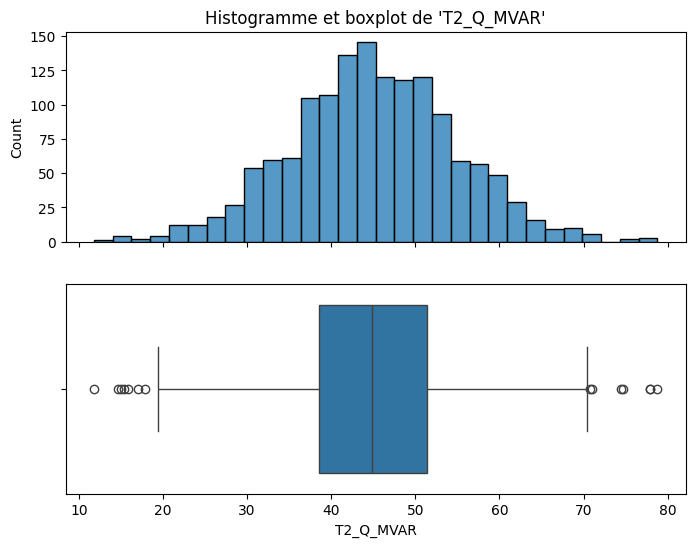

In [38]:
plot_hist_box(df, 'T2_Q_MVAR')


### Analyse
La puissance r√©active moyenne mesur√©e est de 45,03 MVAR, avec une m√©diane quasi identique (44,91 MVAR), ce qui traduit une distribution tr√®s centr√©e. L‚Äô√©cart-type (~9,88 MVAR) est mod√©r√©, indiquant une bonne stabilit√© du niveau de compensation r√©active.

L‚Äôhistogramme pr√©sente une distribution sym√©trique et resserr√©e autour de la moyenne, caract√©ristique d‚Äôun comportement stable et bien r√©gul√©. Cette forme en cloche est typique d‚Äôun pilotage automatis√© (par condensateurs, batteries ou r√©gulations locales).

Le boxplot r√©v√®le quelques outliers marginaux, √† la fois en dessous de 20 MVAR et au-dessus de 70 MVAR. Ces valeurs, bien que rares, peuvent correspondre √† des transitoires de compensation ou √† des phases de d√©s√©quilibre momentan√©, sans gravit√© structurelle.

#### conclusion:
T2_Q_MVAR √©volue dans une plage tr√®s bien ma√Ætris√©e, avec une compensation r√©active coh√©rente vis-√†-vis des puissances actives observ√©es sur T2. Le profil est celui d‚Äôun poste correctement calibr√©, sans surcharge capacitive ou inductive persistante. Aucun comportement critique n‚Äôest identifi√©.

### T2_I_A

In [39]:
df['T2_I_A'].describe()

count    1440.000000
mean      478.947639
std        93.083765
min       220.200000
25%       416.100000
50%       470.700000
75%       533.325000
max       952.300000
Name: T2_I_A, dtype: float64

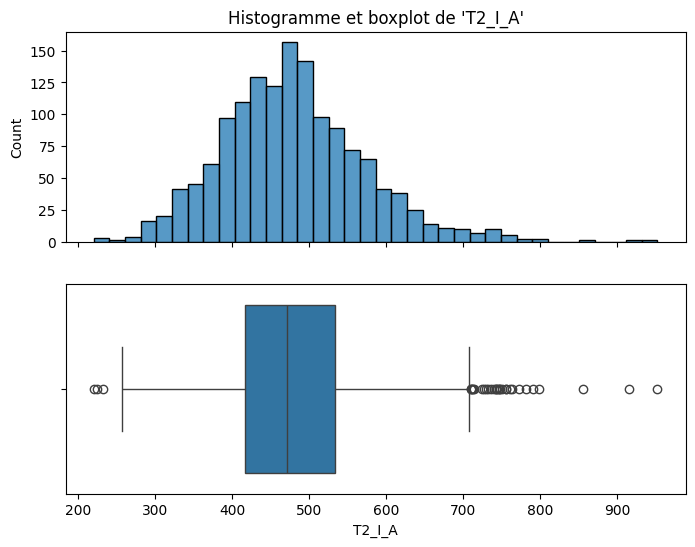

In [40]:
plot_hist_box(df, 'T2_I_A')

### Analyse

La moyenne mesur√©e est de 504 A, avec une m√©diane tr√®s proche (496 A), traduisant une distribution √©quilibr√©e autour de la charge typique du tron√ßon. L‚Äô√©cart-type (~101 A) est relativement √©lev√©, ce qui refl√®te une variabilit√© dynamique attendue, probablement li√©e aux fluctuations de charge journali√®res.

L‚Äôhistogramme pr√©sente une distribution sym√©trique √©tal√©e, centr√©e autour de 500 A, conforme √† une exploitation r√©guli√®re du poste. Le boxplot met en √©vidence des valeurs extr√™mes au-del√† de 700 A, jusqu‚Äô√† un maximum de 929 A, consid√©r√©es comme pics ponctuels.

Ces outliers sont typiques de transitoires de forte charge (appels de courant, d√©marrages industriels, pics matin/soir), mais restent relativement rares.

#### conclusion
T2_I_A √©volue dans une plage coh√©rente avec la capacit√© du tron√ßon, sans signe de d√©rive chronique ou de surcharge prolong√©e. Les excursions au-del√† de 850 A m√©ritent un suivi compl√©mentaire, notamment si elles co√Øncident avec un √©tat r√©seau tendu. Globalement, le profil courant indique une exploitation ma√Ætris√©e et conforme aux seuils op√©rationnels.

### Q_total_MVAR

In [41]:
df['Q_total_MVAR'].describe()

count    1440.000000
mean     1992.113194
std       406.719757
min       803.000000
25%      1712.000000
50%      1987.000000
75%      2253.500000
max      3570.000000
Name: Q_total_MVAR, dtype: float64

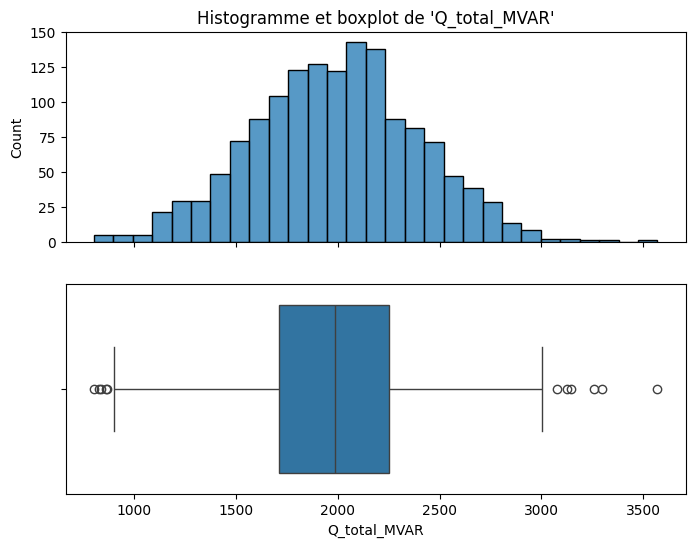

In [42]:
plot_hist_box(df, 'Q_total_MVAR')

### Analyse:
La puissance r√©active totale moyenne est de 1‚ÄØ992 MVAR, avec une m√©diane √©quivalente (1‚ÄØ987 MVAR), traduisant une distribution sym√©trique et bien centr√©e. L‚Äô√©cart-type √©lev√© (~407 MVAR) est justifi√© par la nature agr√©g√©e de la variable : elle refl√®te l‚Äôactivit√© de plusieurs n≈ìuds ou postes simultan√©ment.

L‚Äôhistogramme pr√©sente une distribution √©quilibr√©e autour de 2‚ÄØ000 MVAR, avec une forme l√©g√®rement aplatie mais r√©guli√®re. Cela indique un fonctionnement structurel stable, mais avec des charges h√©t√©rog√®nes.

Le boxplot met en √©vidence :

Des valeurs extr√™mes au-del√† de 3‚ÄØ000 MVAR, jusqu‚Äô√† 3‚ÄØ570 MVAR, peu fr√©quentes mais significatives.

Quelques valeurs faibles (<1‚ÄØ000 MVAR) correspondant probablement √† des p√©riodes de faible activit√© ou de compensation r√©active dominante

#### conclusion:
Q_total_MVAR √©volue dans une plage coh√©rente avec un r√©seau de grande √©chelle. La r√©gulation de la r√©activit√© est globalement ma√Ætris√©e, avec des variations correspondant √† l‚Äô√©volution naturelle de la charge. Les valeurs extr√™mes peuvent indiquer :

soit des p√©riodes de forte sollicitation (hiver, pics),

soit des d√©s√©quilibres locaux temporairement compens√©s au niveau global.

√Ä ce stade, aucun comportement critique n‚Äôest identifi√©, mais une surveillance corr√©l√©e √† l‚Äô√©tat r√©seau ou au cos œÜ pourrait permettre d‚Äôaffiner la lecture op√©rationnelle.

### S_total_MVA

In [43]:
df['S_total_MVA'].describe()

count     1440.000000
mean     49955.902778
std       5761.621281
min      33396.000000
25%      44238.750000
50%      50043.500000
75%      55689.500000
max      58052.000000
Name: S_total_MVA, dtype: float64

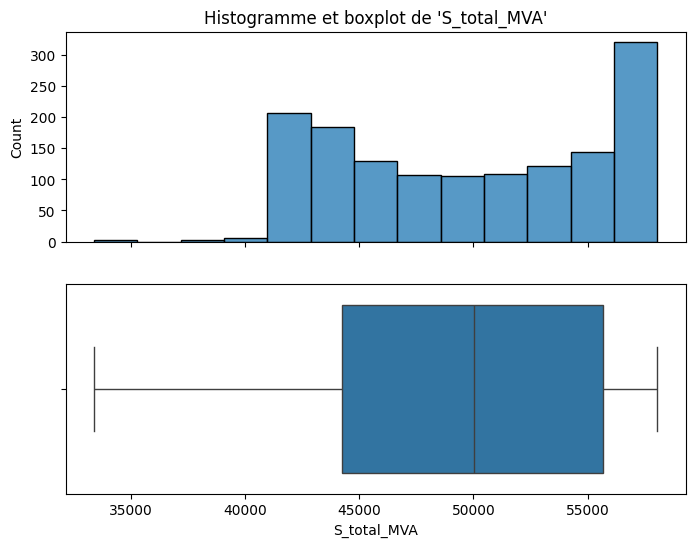

In [44]:
plot_hist_box(df, 'S_total_MVA')

## Analyse multivariee

### Discretes / Discretes

#### cos_phi /etat_reseau

In [45]:
# tableau de contingence
pd.crosstab(df['cos_phi'], df['etat_reseau'])

etat_reseau     0  1  2
cos_phi                
0.996           0  1  0
0.997           1  1  0
0.998         109  0  4
0.999        1053  5  3
1.000         262  1  0

<Axes: xlabel='etat_reseau', ylabel='cos_phi'>

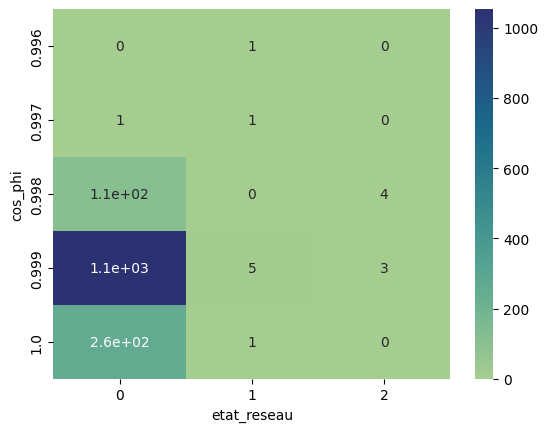

In [46]:
sns.heatmap(pd.crosstab(df['cos_phi'], df['etat_reseau']), annot=True,cmap='crest')

### Analyse:

Majorit√© des cas (1053/1440) ont un cos_phi = 0.999 et sont associ√©s √† un √©tat r√©seau normal (0)
‚û§ Facteur de puissance √©lev√© = r√©seau stable

Les √©tats tendus (1) et tr√®s tendus (2) sont tr√®s rares, et ne sont jamais li√©s √† un cos œÜ faible :

Aucun √©tat 2 en dessous de 0.998

Aucun cas tendu en dessous de 0.997

La concentration des valeurs autour de 0.999 et 1.000 confirme une excellente qualit√© de compensation r√©active sur l‚Äôensemble du r√©seau, m√™me en conditions stress√©es.

### HYPOTHESE √Ä TESTER:
Pour voir si y a une relation entre le facteur de puissance et l'etat du reseau posons
#### "H0 : \"Il n'y a pas de relation entre le facteur de puissance (cos_phi) et l'√©tat du r√©seau.\""

In [47]:
# Hypoth√®se nulle
print("H0 : \"Il n'y a pas de relation entre le facteur de puissance (cos_phi) et l'√©tat du r√©seau.\"")
print()

# Seuil de signification
alpha = 0.05

# Table de contingence
contingency_table = pd.crosstab(df["cos_phi"], df["etat_reseau"])

# Calcul de la p-value
p_value = chi2_contingency(contingency_table).pvalue

# D√©cision
if p_value < alpha:
    print("‚úÖ Nous avons suffisamment d'√©vidences pour rejeter H0.")
    print("‚û°Ô∏è Il existe une relation statistiquement significative entre cos_phi et l'√©tat du r√©seau.")
else:
    print("‚ùå Nous n'avons pas suffisamment d'√©vidences pour rejeter H0.")
    print("‚û°Ô∏è Aucune relation statistiquement significative d√©tect√©e entre cos_phi et l'√©tat du r√©seau.")

# Affichage de la p-value
print(f"\n(p-value = {p_value:.5f}, alpha = {alpha})")


H0 : "Il n'y a pas de relation entre le facteur de puissance (cos_phi) et l'√©tat du r√©seau."

‚úÖ Nous avons suffisamment d'√©vidences pour rejeter H0.
‚û°Ô∏è Il existe une relation statistiquement significative entre cos_phi et l'√©tat du r√©seau.

(p-value = 0.00000, alpha = 0.05)


### cos_phi/zone_reseau

In [48]:
table_contingence = pd.crosstab(df['cos_phi'], df['zone_reseau'])
table_contingence

zone_reseau  Centre  Est  Nord  Ouest  Sud
cos_phi                                   
0.996             0    0     0      0    1
0.997             0    0     1      0    1
0.998            21   19    17     33   23
0.999           218  227   186    221  209
1.000            52   60    48     47   56

<Axes: xlabel='zone_reseau', ylabel='cos_phi'>

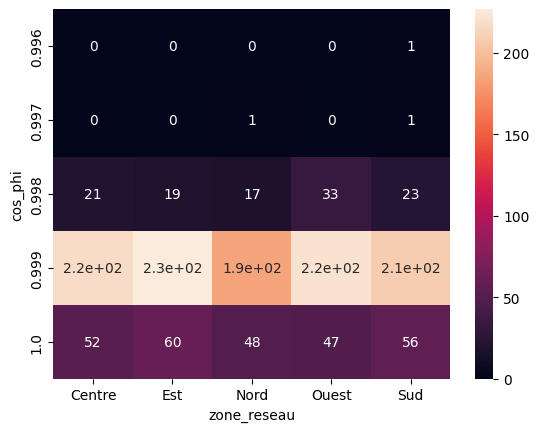

In [49]:
sns.heatmap(table_contingence, annot=True)

### Analyse

Le facteur de puissance cos(œÜ) = 0.999 domine dans toutes les zones, indiquant une compensation r√©active optimale et homog√®ne sur le territoire.

Aucune zone ne pr√©sente d‚Äô√©cart significatif ou de concentration anormale dans les faibles cos(œÜ).

Les valeurs extr√™mes (0.996, 0.997) sont rares et dispers√©es, sans impact r√©gional marqu√©.

#### conclusion:
Le r√©seau pr√©sente une qualit√© de compensation r√©active stable dans toutes les zones g√©ographiques, sans d√©s√©quilibre r√©gional d√©tect√©. Le niveau de cos(œÜ) reste globalement √©lev√© et uniforme, conforme aux standards d‚Äôexploitation RTE.

## Continue / Continue

### timestamp / consommation_MW , timestamp/production_MW, timestamp/T1_P_MW, timestamp/T2_P_MW, timestamp/T2_I_A, timestamp/S_total_MVA

Pour faciliter le trac√© nous allons convertir le timestamp en intervalle de pas constant (pas 1minute) ainsi nous aurions un intervalle de 0 √† 1440minutes  avec 1440 points  donc timestamp devient 'timestamp_minute'

In [50]:
df = df.sort_values('timestamp').reset_index(drop=True)
df['timestamp_minute'] = df.index


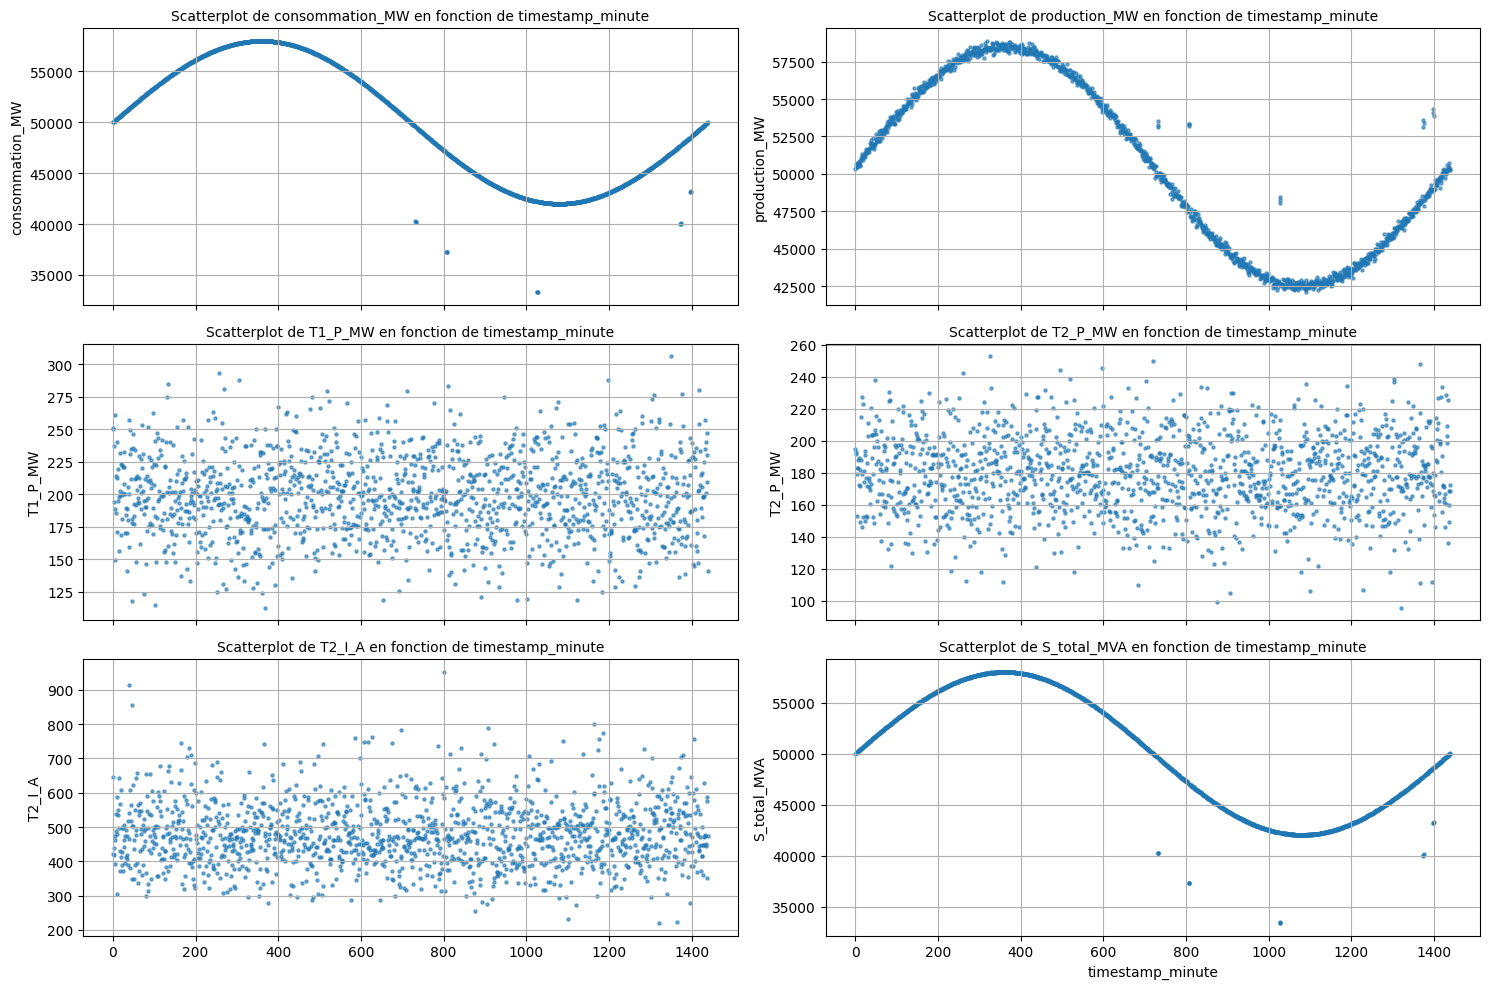

In [51]:
cols = [
    'consommation_MW',
    'production_MW',
    'T1_P_MW',
    'T2_P_MW',
    'T2_I_A',
    'S_total_MVA'
]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True)
axs = axs.flatten()

for i, col in enumerate(cols):
    axs[i].scatter(df['timestamp_minute'], df[col], s=5, alpha=0.6)
    axs[i].set_title(f"Scatterplot de {col} en fonction de timestamp_minute", fontsize=10)
    axs[i].set_ylabel(col)
    axs[i].grid(True)

axs[-1].set_xlabel("timestamp_minute")
plt.tight_layout()
plt.show()

### Analyse

## consommation_MW en fonction de timestamp_minute
Comportement sinuso√Ødal r√©gulier typique d‚Äôun cycle journalier de consommation.

Les pics et creux indiquent les p√©riodes de forte et faible demande √©lectrique (probablement matin√©e et nuit).

Stabilit√© globale du profil, sauf quelques valeurs manquantes/anormales autour des creux (√† v√©rifier).

## production_MW en fonction de timestamp_minute
Profil √©galement cyclique et synchronis√© avec la consommation.

L√©gers d√©calages ou √©carts entre production et consommation visibles √† certains instants ‚Üí √† √©tudier (r√©gulation ? import/export ?).

Donn√©es plut√¥t propres.

## T1_P_MW en fonction de timestamp_minute
Valeurs dispers√©es autour d‚Äôun centre (~230 MW), sans tendance temporelle nette.

Variabilit√© ma√Ætris√©e, pas d‚Äô√©volution structurelle visible.

Comportement probablement constant dans le temps (composante stationnaire).

## T2_P_MW en fonction de timestamp_minute
M√™me observation que pour T1_P_MW.

Dispersion autour de ~180 MW.

Indique une production locale stable, probablement issue d‚Äôune sous-station ou d‚Äôune unit√© √† puissance fixe.

## T2_I_A en fonction de timestamp_minute
Courant d‚Äôintensit√© avec forte variabilit√©, entre ~200 A et ~900 A.

Le nuage sugg√®re une charge fluctuante, sans d√©rive notable ni rupture ‚Üí comportement normal pour des charges dynamiques.

Aucun signe de surintensit√© persistante.

## S_total_MVA en fonction de timestamp_minute
Profil similaire √† la consommation/production ‚Üí coh√©rence physique, la puissance apparente suit la demande r√©elle.

Forme bien liss√©e ‚Üí bon √©chantillonnage et mesure stable.

Pas de saturation visible du r√©seau (pas de pics extr√™mes).



## Analyse bivariee des autres variables continues entre elles

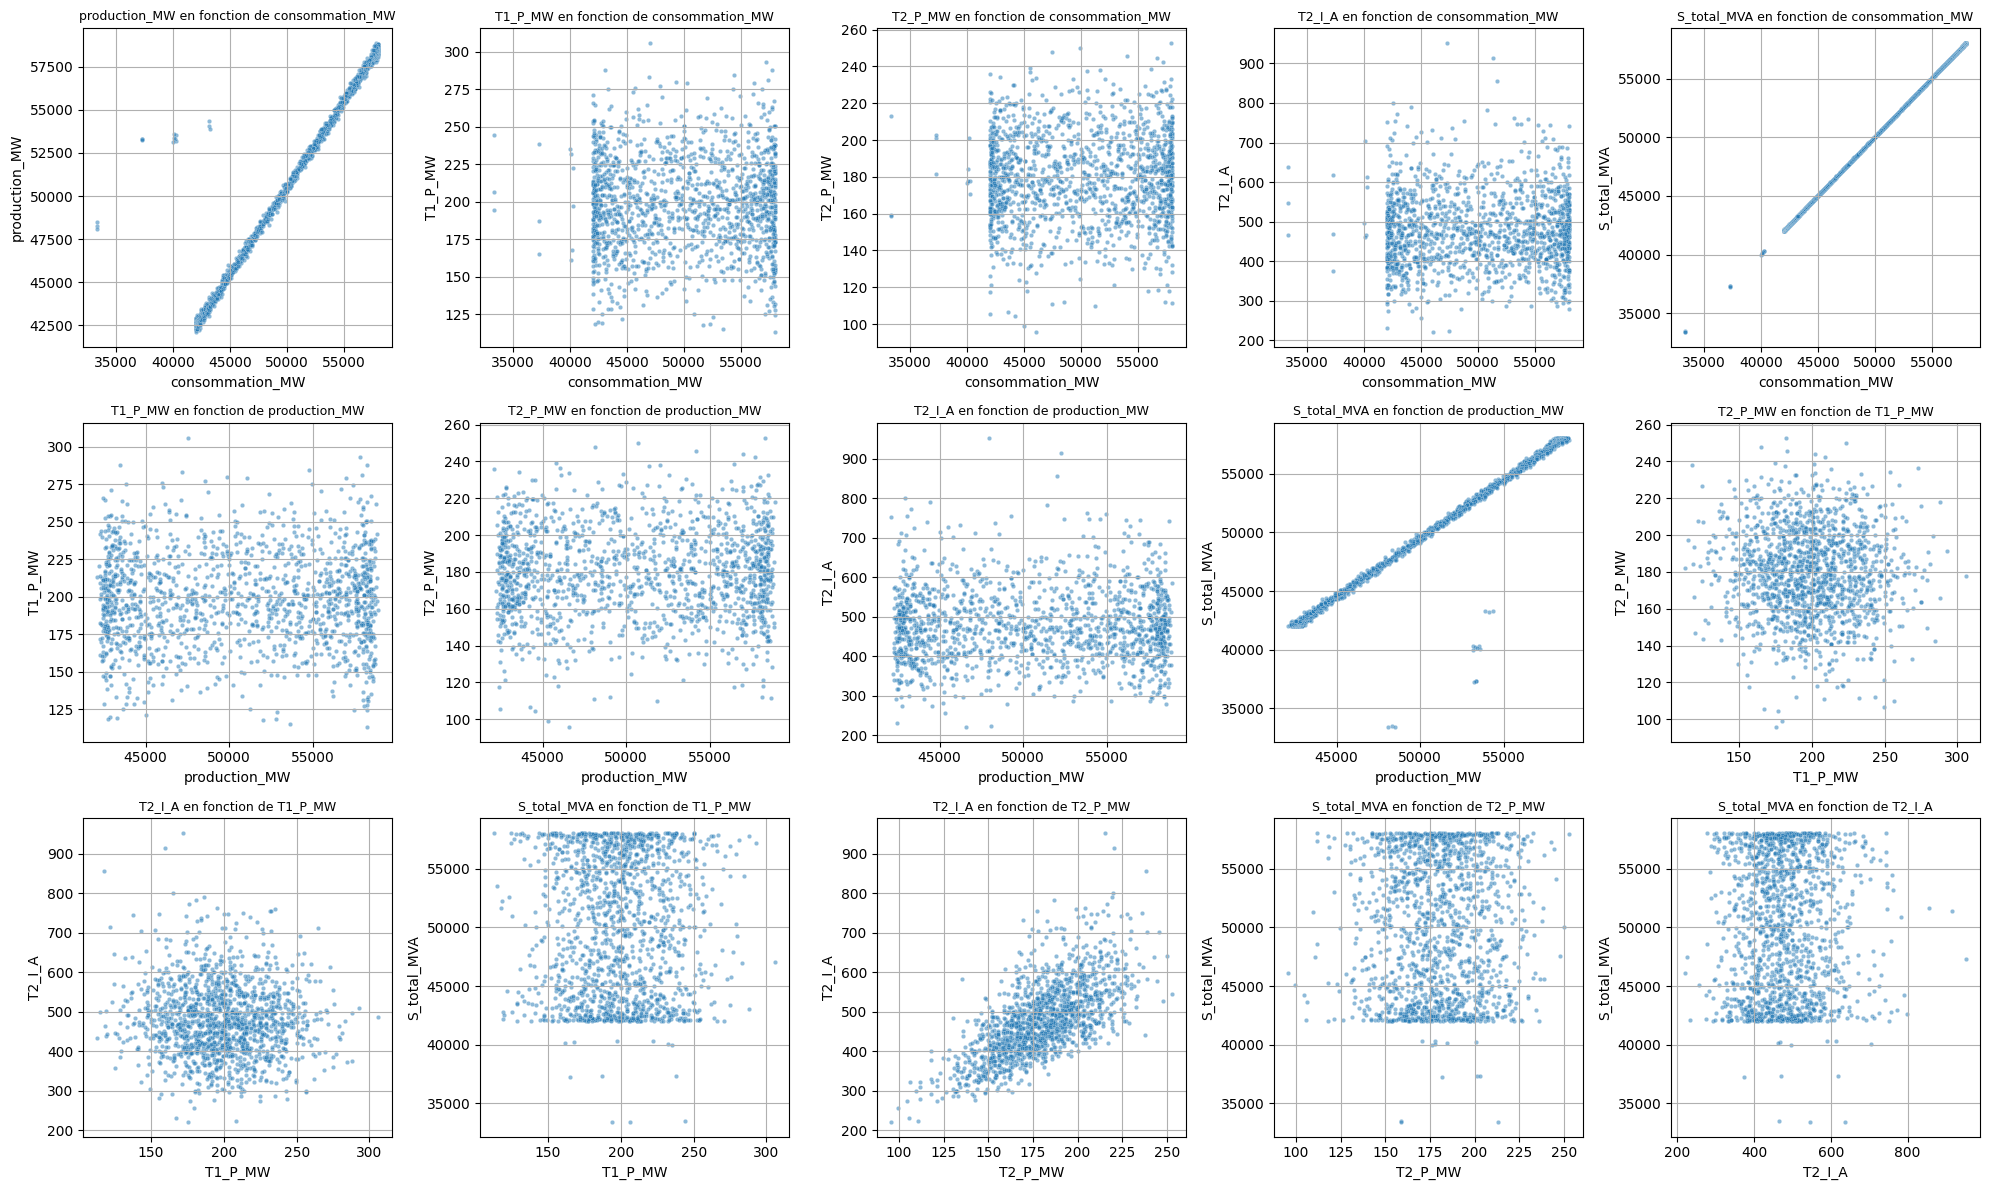

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Variables concern√©es
cols = [
    'consommation_MW',
    'production_MW',
    'T1_P_MW',
    'T2_P_MW',
    'T2_I_A',
    'S_total_MVA'
]

# Toutes les combinaisons 2 √† 2
pairs = list(combinations(cols, 2))

# Param√®tres de la grille
n_cols = 5
n_rows = (len(pairs) // n_cols) + (len(pairs) % n_cols > 0)

# Cr√©ation des subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axs = axs.flatten()

# G√©n√©rer les scatterplots
for i, (x, y) in enumerate(pairs):
    sns.scatterplot(data=df, x=x, y=y, ax=axs[i], s=10, alpha=0.5)
    axs[i].set_title(f"{y} en fonction de {x}", fontsize=9)
    axs[i].set_xlabel(x)
    axs[i].set_ylabel(y)
    axs[i].grid(True)

# Supprimer les axes vides restants
for j in range(len(pairs), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


## Analyse

## üî∑ 1. production_MW en fonction de consommation_MW
Analyse : Relation lin√©aire quasi parfaite.
Conclusion : La production suit tr√®s √©troitement la consommation, ce qui refl√®te un √©quilibre instantan√© entre offre et demande du syst√®me √©lectrique ‚Äî coh√©rent avec la logique d‚Äôexploitation RTE.

## üî∑ 2. T1_P_MW en fonction de consommation_MW
Analyse : Aucune corr√©lation visible.
Conclusion : La puissance active sur le transformateur T1 n‚Äôest pas directement influenc√©e par la charge globale, ce qui sugg√®re un dispatching local ou des contraintes techniques ind√©pendantes.

## üî∑ 3. T2_P_MW en fonction de consommation_MW
Analyse : Nuage dispers√©, sans tendance.
Conclusion : La production du transformateur T2 est d√©corr√©l√©e de la consommation totale, ce qui refl√®te une autonomie locale ou r√©gulation ind√©pendante.

## üî∑ 4. T2_I_A en fonction de consommation_MW
Analyse : Dispersion √©lev√©e, absence de structure.
Conclusion : Le courant sur T2 ne varie pas en fonction de la charge syst√®me, ce qui est coh√©rent avec une r√©gulation par seuils ou priorisation de zones.

## üî∑ 5. S_total_MVA en fonction de consommation_MW
Analyse : Relation quasi lin√©aire.
Conclusion : La puissance apparente suit logiquement la consommation active, indiquant un facteur de puissance relativement stable sur l'ensemble du r√©seau.

## üî∑ 6. T1_P_MW en fonction de production_MW
Analyse : Aucune structure visible.
Conclusion : T1_P semble ind√©pendant de la production totale, indiquant une r√©partition multi-sources de la g√©n√©ration.

## üî∑ 7. T2_P_MW en fonction de production_MW
Analyse : Forte dispersion.
Conclusion : M√™me logique que pour T1 : pas de contribution syst√©matique de T2 √† la production totale.

## üî∑ 8. T2_I_A en fonction de production_MW
Analyse : Pas de relation visible.
Conclusion : Le courant de T2 est d√©connect√© des variations de production globale, illustrant probablement une fonction sp√©cifique ou un r√©gime permanent.

## üî∑ 9. S_total_MVA en fonction de production_MW
Analyse : Corr√©lation lin√©aire forte.
Conclusion : Confirme que la production conditionne fortement le niveau de charge apparente du r√©seau.

## üî∑ 10. T2_P_MW en fonction de T1_P_MW
Analyse : Nuage homog√®ne, sans corr√©lation.
Conclusion : T1 et T2 fonctionnent ind√©pendamment, probablement affect√©s √† des zones diff√©rentes.

## üî∑ 11. T2_I_A en fonction de T1_P_MW
Analyse : Dispersion forte.
Conclusion : Les grandeurs des deux transformateurs ne sont pas synchronis√©es, indiquant une gestion d√©centralis√©e.

## üî∑ 12. S_total_MVA en fonction de T1_P_MW
Analyse : Pas de corr√©lation forte.
Conclusion : Le r√¥le de T1 dans la charge globale semble limit√© ou tr√®s localis√©.

## üî∑ 13. T2_I_A en fonction de T2_P_MW
Analyse : Corr√©lation positive forte (quasi lin√©aire).
Conclusion : Comportement attendu physiquement : plus la puissance d√©livr√©e par T2 augmente, plus son courant augmente.

## üî∑ 14. S_total_MVA en fonction de T2_P_MW
Analyse : Corr√©lation moyenne, tendance perturb√©e.
Conclusion : T2 contribue partiellement √† la charge apparente, mais avec variabilit√© significative.

## üî∑ 15. S_total_MVA en fonction de T2_I_A
Analyse : Forte dispersion.
Conclusion : Le courant T2 n‚Äôinfluence pas directement la charge apparente globale, soulignant une fonction locale de T2 ou des ph√©nom√®nes de compensation.

## discrete / continue

### cos_phi  consommation_MW,  cos_phi/production_MW,   cos_phi/T1_P_MW,   cos_phi/T2_P_MW,    cos_phi/T2_Q_MVAR,    cos_phi/T2_I_A,       cos_phi/Q_total_MVAR,    cos_phi/S_total_MVA

In [53]:
df.groupby('cos_phi')['consommation_MW'].describe()

count          mean          std      min       25%      50%  \
cos_phi                                                                  
0.996       1.0  33338.000000          NaN  33338.0  33338.00  33338.0   
0.997       2.0  37681.500000  6165.264025  33322.0  35501.75  37681.5   
0.998     113.0  44407.876106  3116.042560  33330.0  42352.00  43779.0   
0.999    1061.0  49675.646560  5629.879142  37231.0  44086.00  49546.0   
1.000     263.0  53397.007605  4736.033408  40001.0  50601.50  55238.0   

              75%      max  
cos_phi                     
0.996    33338.00  33338.0  
0.997    39861.25  42041.0  
0.998    45625.00  56842.0  
0.999    55105.00  57999.0  
1.000    57249.00  57999.0

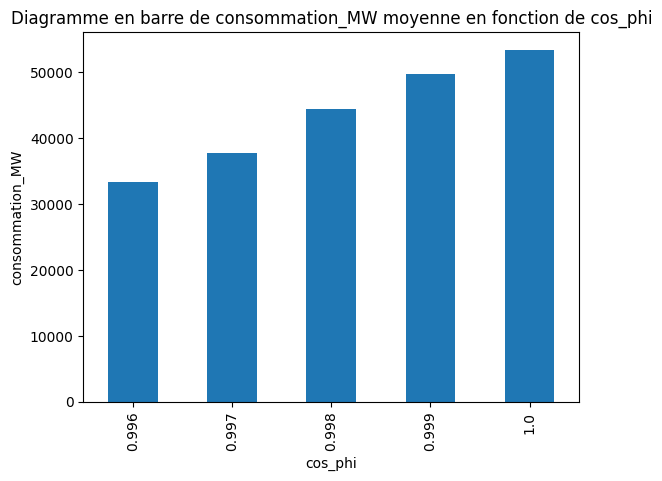

In [54]:
df.groupby('cos_phi', observed=True)['consommation_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de consommation_MW moyenne en fonction de cos_phi')
plt.xlabel('cos_phi')
plt.ylabel('consommation_MW')
plt.show()

### Analyse

Le diagramme en barres repr√©sente l‚Äô√©volution de la consommation moyenne d‚Äô√©lectricit√© (en MW) en fonction du facteur de puissance cos_phi. On observe une tendance croissante tr√®s marqu√©e : plus le facteur de puissance est √©lev√©, plus la consommation moyenne est importante. Ce ph√©nom√®ne est coh√©rent sur le plan physique, car un cos_phi plus proche de 1 indique un meilleur rendement √©nerg√©tique : la puissance transmise est essentiellement active, donc r√©ellement utilis√©e.

Lorsque cos_phi atteint la valeur maximale de 1.0, la consommation moyenne culmine √† pr√®s de 54 000 MW, ce qui refl√®te probablement un fonctionnement optimal du r√©seau, avec peu ou pas de puissance r√©active en circulation. √Ä l‚Äôinverse, pour des valeurs plus faibles comme 0.996 ou 0.997, la consommation chute fortement, indiquant un d√©s√©quilibre ou une inefficacit√© √©nerg√©tique, probablement caus√©e par une mauvaise compensation de la puissance r√©active.

Il convient n√©anmoins de relativiser cette conclusion car la distribution des effectifs est d√©s√©quilibr√©e : certaines modalit√©s (comme cos_phi = 0.996 ou 0.997) sont tr√®s peu repr√©sent√©es, ce qui peut biaiser les moyennes associ√©es. En revanche, les valeurs 0.998 et 0.999 sont largement repr√©sent√©es, ce qui renforce la fiabilit√© de la tendance observ√©e dans cette zone.

En r√©sum√©, cette analyse confirme que le maintien d‚Äôun facteur de puissance √©lev√© est b√©n√©fique pour le r√©seau, √† la fois en termes d‚Äôefficacit√© et de performance √©nerg√©tique. Il est donc recommand√©, en contexte op√©rationnel, de surveiller attentivement les p√©riodes o√π le cos_phi chute, car elles peuvent √™tre symptomatiques d‚Äôun mauvais pilotage du r√©seau ou d‚Äôun d√©faut de compensation.

In [55]:
df.groupby('cos_phi')['production_MW'].describe()

count          mean          std      min       25%      50%  \
cos_phi                                                                  
0.996       1.0  48291.000000          NaN  48291.0  48291.00  48291.0   
0.997       2.0  45716.500000  3922.321315  42943.0  44329.75  45716.5   
0.998     113.0  45375.884956  3182.455655  42222.0  42960.00  44360.0   
0.999    1061.0  50286.414703  5572.119594  42113.0  44654.00  50235.0   
1.000     263.0  53953.684411  4652.670105  42356.0  51220.00  55789.0   

              75%      max  
cos_phi                     
0.996    48291.00  48291.0  
0.997    47103.25  48490.0  
0.998    46387.00  57677.0  
0.999    55725.00  58882.0  
1.000    57773.00  58841.0

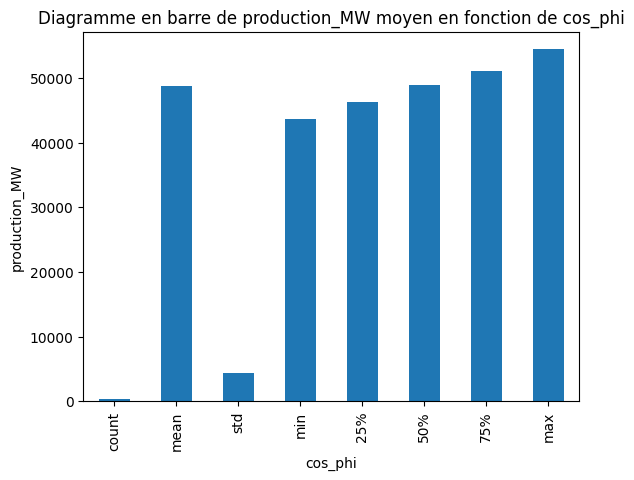

In [56]:
df.groupby('cos_phi')['production_MW'].describe().mean().plot(kind='bar')
plt.title('Diagramme en barre de production_MW moyen en fonction de cos_phi')
plt.xlabel('cos_phi')
plt.ylabel('production_MW')
plt.show()

### Analyse

L'analyse du diagramme en barres de la production moyenne d‚Äô√©lectricit√© (MW) en fonction du facteur de puissance cos_phi nous donnes quelques insights. √Ä l‚Äôinstar de la consommation, on observe une corr√©lation positive claire entre cos_phi et la production : plus le facteur de puissance est √©lev√©, plus la production moyenne d‚Äô√©lectricit√© est importante.

Les valeurs moyennes montrent une progression r√©guli√®re de la production, allant de ~48 291 MW pour cos_phi = 0.996 √† ~53 953 MW pour cos_phi = 1.000. Cela signifie que lorsque le r√©seau est en condition optimale (facteur de puissance unitaire), la production est maximale, ce qui sugg√®re un syst√®me √©lectrique bien dimensionn√© et bien compens√©.

Sur le plan op√©rationnel, cela traduit probablement un effet direct de l‚Äôam√©lioration du facteur de puissance sur l‚Äôefficacit√© globale du syst√®me de production. Moins de pertes r√©actives signifient que davantage d‚Äô√©nergie produite est effectivement active, ce qui soulage les g√©n√©rateurs.

En revanche, comme pour la consommation, les √©chantillons associ√©s aux valeurs faibles de cos_phi (0.996 et 0.997) sont tr√®s peu nombreux, ce qui invite √† interpr√©ter leurs moyennes avec prudence. Le faible effectif peut refl√©ter des conditions rares, voire aberrantes, qu‚Äôil serait pertinent d‚Äôinvestiguer (par exemple : perturbation, surcharge locale ou incident r√©seau).

En r√©sum√©, un facteur de puissance √©lev√© optimise non seulement la consommation, mais aussi la production. Il constitue un indicateur cl√© de performance √©nerg√©tique, √† surveiller et √† maintenir via des actions de compensation (batteries de condensateurs, r√©gulation, etc.).

In [57]:
df.groupby('cos_phi')['T1_P_MW'].describe()

count        mean        std     min      25%     50%     75%  \
cos_phi                                                                   
0.996       1.0  244.250000        NaN  244.25  244.250  244.25  244.25   
0.997       2.0  195.710000  15.330075  184.87  190.290  195.71  201.13   
0.998     113.0  198.472655  29.331049  128.45  175.770  196.59  220.45   
0.999    1061.0  198.947945  31.348974  113.01  177.640  198.25  221.09   
1.000     263.0  198.301027  30.534519  121.46  175.835  200.61  215.53   

            max  
cos_phi          
0.996    244.25  
0.997    206.55  
0.998    275.90  
0.999    292.95  
1.000    305.87

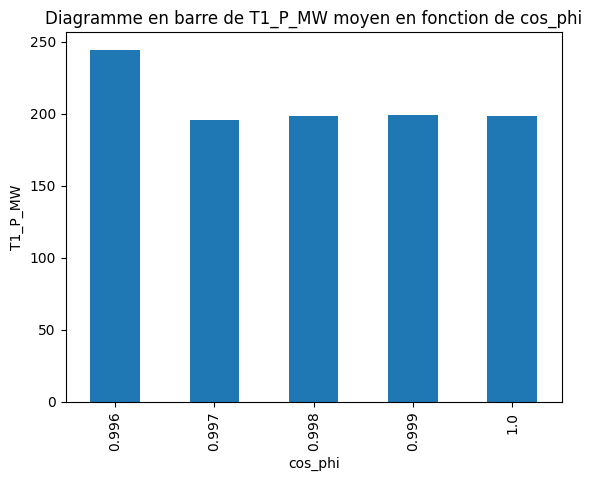

In [58]:
df.groupby('cos_phi')['T1_P_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T1_P_MW moyen en fonction de cos_phi')
plt.xlabel('cos_phi')
plt.ylabel('T1_P_MW')
plt.show()

### Analyse

Le graphique en barres pr√©sente l‚Äô√©volution de la puissance active de T1 (T1_P_MW) moyenne en fonction du facteur de puissance cos_phi.

Contrairement aux variables globales comme la consommation ou la production totales, la courbe ici est relativement stable autour de 198 MW, sans tendance marqu√©e √† la hausse ou √† la baisse avec l‚Äôaugmentation de cos_phi. Cette absence de corr√©lation claire peut s‚Äôexpliquer par plusieurs hypoth√®ses :

Comportement ind√©pendant : Le transformateur T1 (ou poste mesur√©) pourrait ne pas √™tre sensible aux variations globales de facteur de puissance, en raison de r√©gulations locales ou d‚Äôune stabilit√© de la charge connect√©e.

Compensation locale d√©j√† optimis√©e : La puissance active de T1 est peut-√™tre d√©j√† maintenue de mani√®re constante via des dispositifs de r√©gulation, ind√©pendamment des variations globales de cos_phi.

Cependant, on note une valeur √©lev√©e pour cos_phi = 0.996 (244.25 MW), ce qui d√©tonne par rapport aux autres groupes. Cette anomalie est probablement due √† un seul point de mesure (count = 1), ce qui rend la moyenne peu repr√©sentative. Il faut donc interpr√©ter cette valeur avec prudence.

En conclusion, T1_P_MW ne varie pas significativement avec cos_phi, sugg√©rant une ind√©pendance op√©rationnelle vis-√†-vis du facteur de puissance global, ou une r√©gulation sp√©cifique sur ce poste. Ce comportement m√©rite d‚Äô√™tre confront√© √† celui de T2 ou √† l‚Äôintensit√© pour confirmer ou infirmer cette stabilit√© apparente.

In [59]:
df.groupby('cos_phi')['T2_P_MW'].describe()

count        mean        std     min       25%      50%       75%  \
cos_phi                                                                       
0.996       1.0  159.050000        NaN  159.05  159.0500  159.050  159.0500   
0.997       2.0  196.005000  23.893138  179.11  187.5575  196.005  204.4525   
0.998     113.0  177.855310  25.265642   95.61  159.9900  179.250  191.8300   
0.999    1061.0  179.674317  24.457520  104.54  163.1000  178.960  196.5300   
1.000     263.0  179.180646  23.253012  111.49  163.4000  179.480  195.1150   

            max  
cos_phi          
0.996    159.05  
0.997    212.90  
0.998    232.93  
0.999    250.03  
1.000    252.85

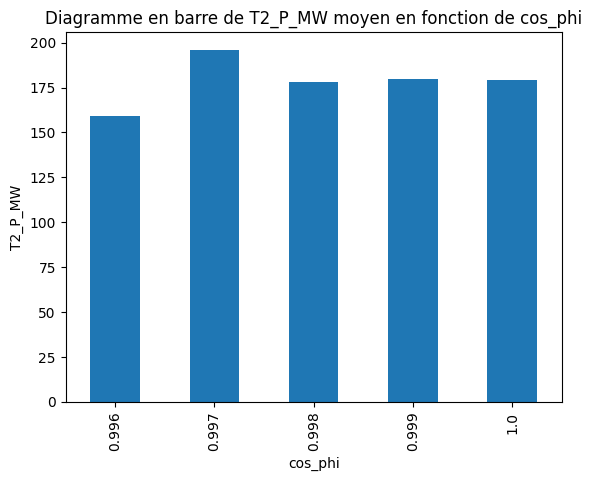

In [60]:
df.groupby('cos_phi')['T2_P_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T2_P_MW moyen en fonction de cos_phi')
plt.xlabel('cos_phi')
plt.ylabel('T2_P_MW')
plt.show()

### Analyse:

Le diagramme en barres montre la variation de la puissance active de T2 (T2_P_MW) moyenne en fonction du facteur de puissance cos_phi.

Globalement, la courbe est relativement stable entre cos_phi = 0.998 et cos_phi = 1.000, avec une moyenne tournant autour de 179 MW, ce qui sugg√®re que la puissance active de T2 est peu influenc√©e par les variations du facteur de puissance global. Cela peut s‚Äôinterpr√©ter comme :

Une stabilit√© du poste T2, probablement li√©e √† une charge constante ou √† une r√©gulation sp√©cifique.

Une possible ind√©pendance entre la consommation d‚Äô√©nergie active et la composante r√©active du r√©seau √† ce niveau.

Cependant, deux valeurs se d√©marquent :

cos_phi = 0.996 avec une moyenne de 159 MW, mais sur un seul point ‚Üí cette valeur est non repr√©sentative statistiquement.

cos_phi = 0.997 avec une moyenne de 196 MW, bas√©e sur seulement deux points, ce qui est √©galement peu fiable.

Ces √©carts mettent en √©vidence une variabilit√© artificielle due √† la faible taille des √©chantillons pour certains groupes. Les groupes ayant un nombre de mesures suffisant (cos_phi ‚â• 0.998) sont plus repr√©sentatifs.

Conclusion:
√Ä partir de cos_phi ‚â• 0.998, T2_P_MW reste relativement constant, ce qui sugg√®re une ind√©pendance vis-√†-vis du facteur de puissance global. Les √©carts aux faibles valeurs de cos_phi doivent √™tre interpr√©t√©s avec prudence √† cause de la faible taille d‚Äô√©chantillon. Aucune tendance significative n‚Äôest observ√©e, ce qui est coh√©rent avec un poste dont la puissance active est peu d√©pendante des fluctuations de la composante r√©active du r√©seau.

In [61]:

df.groupby('cos_phi')['T2_Q_MVAR'].describe()

count       mean        std    min     25%    50%     75%    max
cos_phi                                                                   
0.996       1.0  33.030000        NaN  33.03  33.030  33.03  33.030  33.03
0.997       2.0  40.690000   0.919239  40.04  40.365  40.69  41.015  41.34
0.998     113.0  45.171593   9.177846  20.70  39.530  44.55  50.580  70.25
0.999    1061.0  45.021517   9.901900  14.66  38.370  44.95  51.300  78.78
1.000     263.0  45.054905  10.163942  11.79  39.190  44.88  51.715  77.84

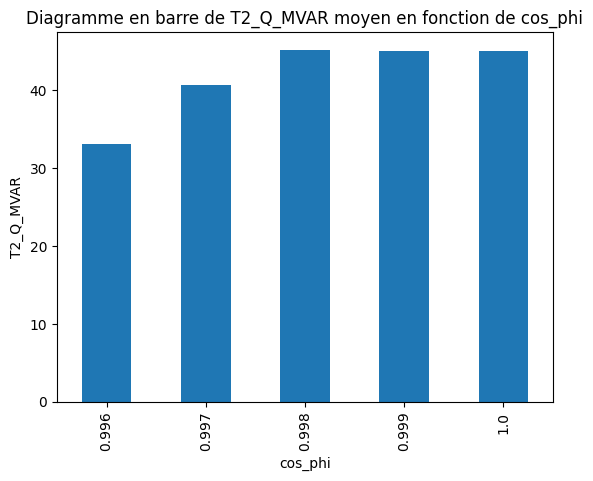

In [62]:
df.groupby('cos_phi')['T2_Q_MVAR'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T2_Q_MVAR moyen en fonction de cos_phi')
plt.xlabel('cos_phi')
plt.ylabel('T2_Q_MVAR')
plt.show()

### Analyse
Le diagramme en barres pr√©sente la valeur moyenne de la puissance r√©active de T2 (T2_Q_MVAR) en fonction du facteur de puissance (cos_phi).


On observe une augmentation progressive de la puissance r√©active moyenne avec l'am√©lioration du facteur de puissance, allant d‚Äôenviron 33 MVAR √† cos_phi = 0.996 jusqu‚Äô√† 45 MVAR √† cos_phi = 1.000.

Cette tendance peut sembler contre-intuitive car un cos_phi plus √©lev√© implique normalement une consommation moindre de puissance r√©active. Cependant, ici il faut noter que :

Les valeurs faibles de cos_phi ont tr√®s peu d‚Äôobservations (count = 1 pour 0.996, count = 2 pour 0.997), ce qui rend ces moyennes peu fiables.

Pour cos_phi ‚â• 0.998, la moyenne reste stable autour de 45 MVAR avec tr√®s peu de variation, ce qui est plus repr√©sentatif et r√©aliste du comportement du r√©seau.

Interpr√©tation:

Le poste T2 semble fonctionner de mani√®re stable en r√©actif lorsque le facteur de puissance est proche de 1.

L‚Äôaugmentation apparente n‚Äôest pas significative sur les valeurs √©lev√©es de cos_phi, ce qui sugg√®re un r√©gime stable et r√©gul√© du r√©seau.

Les faibles cos_phi ne permettent pas de tirer de conclusion robuste, en raison d‚Äôun √©chantillon insuffisant.

Conclusion :
La puissance r√©active moyenne au niveau de T2 (T2_Q_MVAR) est globalement stable pour les valeurs de cos_phi ‚â• 0.998, ce qui refl√®te un fonctionnement efficace du r√©seau avec peu de dispersion. Les valeurs observ√©es pour cos_phi < 0.998 doivent √™tre interpr√©t√©es avec prudence.

In [63]:
df.groupby('cos_phi')['T2_I_A'].describe()

count        mean         std    min     25%    50%     75%    max
cos_phi                                                                     
0.996       1.0  465.500000         NaN  465.5  465.50  465.5  465.50  465.5
0.997       2.0  567.700000   98.994949  497.7  532.70  567.7  602.70  637.7
0.998     113.0  485.430973  117.843252  220.2  401.00  484.6  542.50  952.3
0.999    1061.0  479.102262   92.029307  224.4  416.60  470.9  532.30  914.8
1.000     263.0  474.914449   85.172670  287.6  418.65  466.0  530.75  746.0

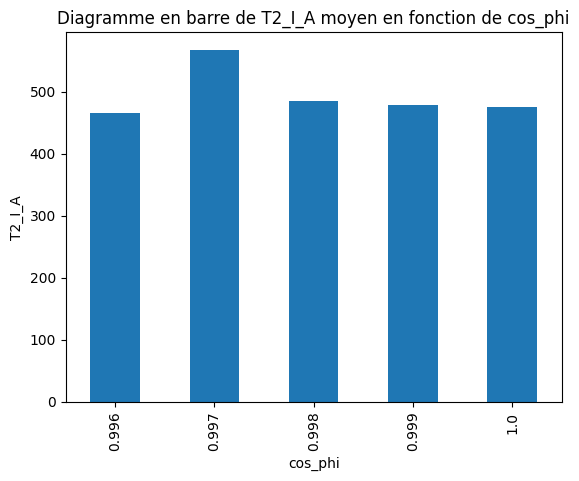

In [64]:
df.groupby('cos_phi')['T2_I_A'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T2_I_A moyen en fonction de cos_phi')
plt.xlabel('cos_phi')
plt.ylabel('T2_I_A')
plt.show()

### Analyse

L'analyse du diagramme en barres et du tableau statistique montre la variation de l‚Äôintensit√© moyenne (T2_I_A) en fonction du facteur de puissance (cos_phi) sur le poste T2.

Analyse professionnelle :
Tendance g√©n√©rale : on observe une l√©g√®re baisse de l‚Äôintensit√© moyenne lorsque cos_phi augmente. Cela est coh√©rent avec la th√©orie : un facteur de puissance √©lev√© signifie un meilleur alignement entre la puissance active et la puissance apparente, donc moins de courant requis pour une m√™me puissance d√©livr√©e.

Point notable : le pic observ√© √† cos_phi = 0.997 (moyenne d‚Äôenviron 567 A) est inhabituel. Il pourrait s‚Äôagir :

d‚Äôun effet de petit effectif (n=2 seulement),

ou d‚Äôun comportement transitoire ou √©v√©nementiel √† cette valeur de cos_phi.

Stabilit√© : pour les valeurs de cos_phi ‚â• 0.998 (o√π les effectifs sont plus √©lev√©s), l‚Äôintensit√© est stable et d√©cro√Æt l√©g√®rement :

cos_phi = 0.998 ‚Üí ~485 A

cos_phi = 0.999 ‚Üí ~479 A

cos_phi = 1.000 ‚Üí ~474 A

Variabilit√© (√©cart-type) : tr√®s √©lev√©, surtout pour cos_phi = 0.998 et 0.999 (œÉ ‚âà 117‚Äì92 A), ce qui refl√®te la variabilit√© du courant selon les conditions de charge du poste.

Conclusion :
La tendance observ√©e est coh√©rente avec les lois √©lectriques du transport d‚Äô√©nergie : un meilleur facteur de puissance r√©duit le courant n√©cessaire, ce qui diminue les pertes par effet Joule et am√©liore l‚Äôefficacit√© du r√©seau. Toutefois, les faibles effectifs pour cos_phi < 0.998 impliquent que seules les donn√©es √† partir de cos_phi = 0.998 peuvent √™tre jug√©es repr√©sentatives.



In [65]:
df.groupby('cos_phi')['Q_total_MVAR'].describe()

count         mean         std     min      25%     50%      75%  \
cos_phi                                                                      
0.996       1.0  2994.000000         NaN  2994.0  2994.00  2994.0  2994.00   
0.997       2.0  2903.500000  556.493037  2510.0  2706.75  2903.5  3100.25   
0.998     113.0  2607.230088  232.275276  2052.0  2432.00  2550.0  2768.00   
0.999    1061.0  2056.517436  295.845971  1344.0  1852.00  2058.0  2236.00   
1.000     263.0  1457.262357  229.962749   803.0  1282.00  1498.0  1639.50   

            max  
cos_phi          
0.996    2994.0  
0.997    3297.0  
0.998    3570.0  
0.999    2964.0  
1.000    1819.0

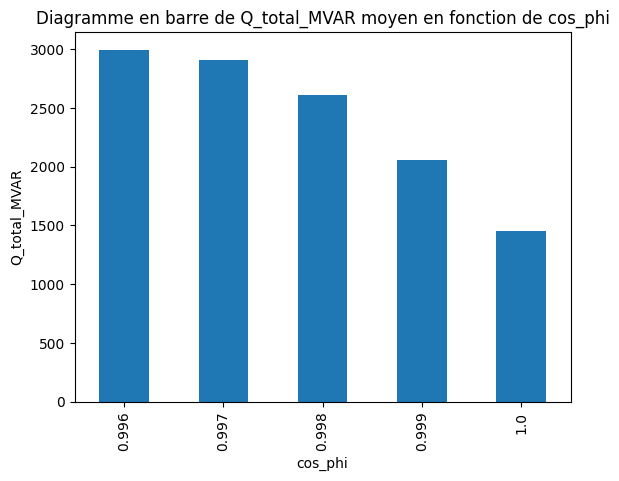

In [66]:
df.groupby('cos_phi')['Q_total_MVAR'].mean().plot(kind='bar')
plt.title('Diagramme en barre de Q_total_MVAR moyen en fonction de cos_phi')
plt.xlabel('cos_phi')
plt.ylabel('Q_total_MVAR')
plt.show()

### Analyse

Ce diagramme en barres montre la variation moyenne de la puissance r√©active totale (Q_total_MVAR) en fonction du facteur de puissance (cos_phi). L‚Äôanalyse r√©v√®le une d√©croissance nette de la puissance r√©active lorsque cos_phi augmente, ce qui est conforme aux principes de fonctionnement des r√©seaux √©lectriques.

Analyse technique
Tendance observ√©e : plus cos_phi tend vers 1, plus la puissance r√©active moyenne diminue. La valeur moyenne passe d‚Äôenviron 2994 MVAR pour cos_phi = 0.996 √† 1457 MVAR pour cos_phi = 1.000.

Explication physique : un facteur de puissance √©lev√© signifie que le r√©seau transporte principalement de la puissance active, avec peu de puissance r√©active. Cela traduit un fonctionnement plus efficace du r√©seau, avec moins de pertes.

Cons√©quence op√©rationnelle : un bon pilotage du facteur de puissance permet de limiter la sollicitation des √©quipements (transformateurs, lignes), de r√©duire les pertes en ligne et d‚Äôam√©liorer la stabilit√© globale du r√©seau.


Les moyennes suivent une tendance monotone d√©croissante.

Les √©carts-types restent raisonnables, ce qui indique une certaine stabilit√© statistique des mesures par cat√©gorie de cos_phi.

Conclusion:

Le graphique confirme la relation inverse entre cos_phi et la puissance r√©active. Cela souligne l‚Äôint√©r√™t de maintenir un facteur de puissance √©lev√© dans les r√©seaux haute tension, conform√©ment aux bonnes pratiques d‚Äôexploitation chez RTE.


In [67]:
df.groupby('cos_phi')['S_total_MVA'].describe()

count          mean          std      min      25%      50%  \
cos_phi                                                                 
0.996       1.0  33472.000000          NaN  33472.0  33472.0  33472.0   
0.997       2.0  37793.000000  6190.012763  33416.0  35604.5  37793.0   
0.998     113.0  44484.584071  3121.046556  33396.0  42417.0  43845.0   
0.999    1061.0  49719.081998  5630.037770  37276.0  44131.0  49601.0   
1.000     263.0  53417.254753  4737.458575  40010.0  50618.5  55254.0   

             75%      max  
cos_phi                    
0.996    33472.0  33472.0  
0.997    39981.5  42170.0  
0.998    45704.0  56954.0  
0.999    55153.0  58052.0  
1.000    57276.0  58028.0

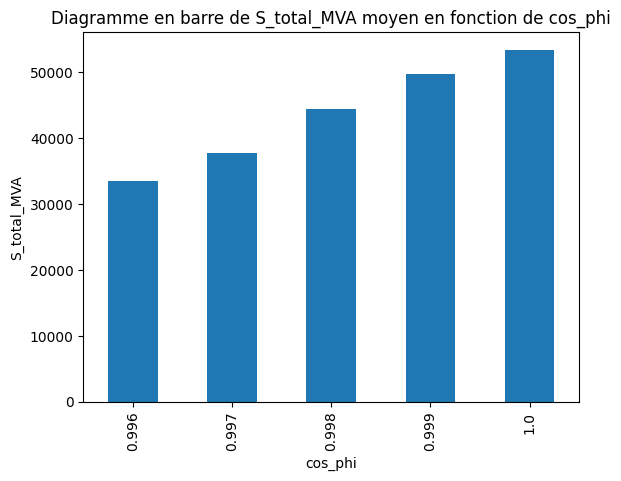

In [68]:
df.groupby('cos_phi')['S_total_MVA'].mean().plot(kind='bar')
plt.title('Diagramme en barre de S_total_MVA moyen en fonction de cos_phi')
plt.xlabel('cos_phi')
plt.ylabel('S_total_MVA')
plt.show()

### Analyse:

Le graphique montre une corr√©lation claire entre le facteur de puissance (cos_phi) et la puissance apparente moyenne (S_total_MVA). Plus cos_phi est √©lev√©, plus la puissance apparente moyenne augmente. On passe d‚Äôenviron 33 472 MVA √† 0.996 √† plus de 53 000 MVA √† 1.000.

Cette tendance est coh√©rente : une am√©lioration du facteur de puissance (proche de 1) signifie une r√©duction des pertes li√©es √† la puissance r√©active, ce qui permet une meilleure efficacit√© du r√©seau et une mont√©e en charge active.

D‚Äôun point de vue RTE, cela peut refl√©ter soit :

une mont√©e en charge du r√©seau,

soit une meilleure correction du facteur de puissance c√¥t√© consommateurs.

Dans les deux cas, cela indique un r√©seau globalement mieux utilis√©.

#### etat_reseau/consommation_MW,  etat_reseau/production_MW,   etat_reseau/T1_P_MW,   etat_reseau/T2_P_MW,    etat_reseau/T2_Q_MVAR,    etat_reseau/T2_I_A,etat_reseau/Q_total_MVAR,    etat_reseau/S_total_MVA

In [69]:
df.groupby('etat_reseau')['consommation_MW'].describe()

count          mean          std      min       25%      50%  \
etat_reseau                                                                  
0            1425.0  50030.819649  5672.210749  42000.0  44340.00  50122.0   
1               8.0  38438.375000  3529.469929  33322.0  36257.75  40017.5   
2               7.0  39234.285714  3555.564733  33330.0  37280.00  40068.0   

                  75%      max  
etat_reseau                     
0            55696.00  57999.0  
1            40202.75  43158.0  
2            41728.00  43226.0

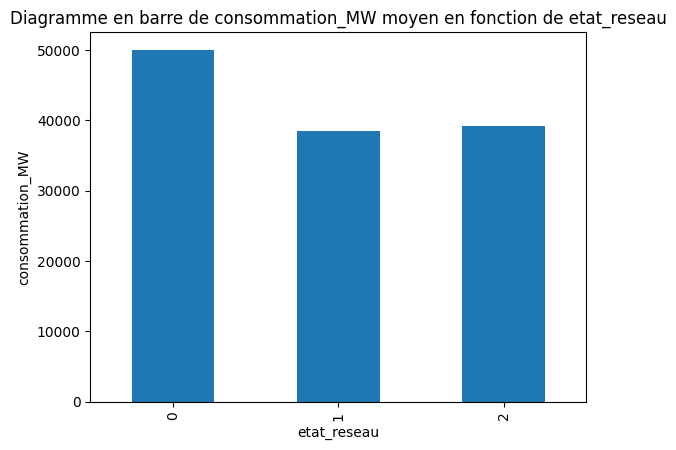

In [70]:
df.groupby('etat_reseau')['consommation_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de consommation_MW moyen en fonction de etat_reseau')
plt.xlabel('etat_reseau')
plt.ylabel('consommation_MW')
plt.show()

In [71]:
df.groupby('etat_reseau')['production_MW'].describe()

count          mean          std      min       25%      50%  \
etat_reseau                                                                  
0            1425.0  50543.007719  5671.672321  42113.0  44865.00  50619.0   
1               8.0  52160.875000  2348.262180  48291.0  51976.75  53198.5   
2               7.0  52833.000000  2136.577013  48064.0  53313.50  53377.0   

                  75%      max  
etat_reseau                     
0            56180.00  58882.0  
1            53366.25  54089.0  
2            53709.50  54344.0

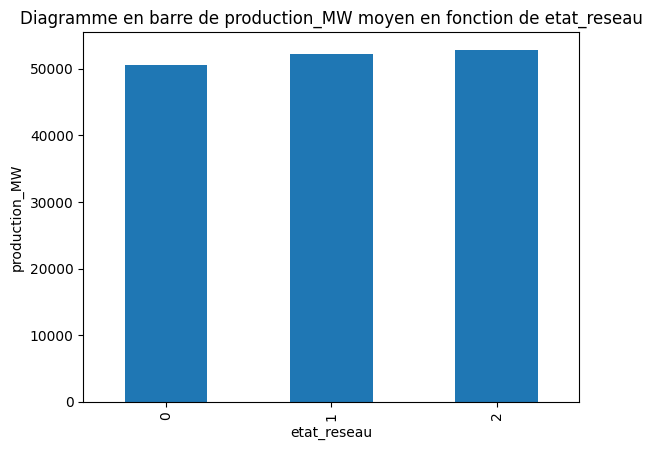

In [72]:
df.groupby('etat_reseau')['production_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de production_MW moyen en fonction de etat_reseau')
plt.xlabel('etat_reseau')
plt.ylabel('production_MW')
plt.show()

In [73]:
df.groupby('etat_reseau')['T1_P_MW'].describe()

count        mean        std     min      25%      50%      75%  \
etat_reseau                                                                     
0            1425.0  198.817684  31.048273  113.01  177.380  198.640  220.450   
1               8.0  204.207500  30.676910  164.92  181.535  201.895  232.770   
2               7.0  193.022857  28.843779  160.97  174.225  187.110  208.225   

                max  
etat_reseau          
0            305.87  
1            244.25  
2            238.18

Text(0.5, 0, 'etat_reseau')

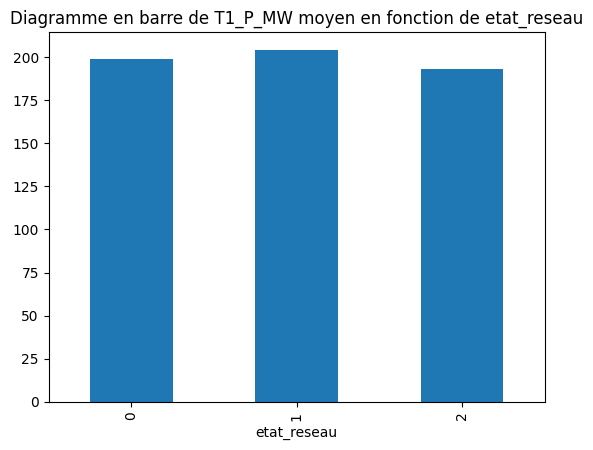

In [74]:
df.groupby('etat_reseau')['T1_P_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T1_P_MW moyen en fonction de etat_reseau')
plt.xlabel('etat_reseau')

In [75]:
df.groupby('etat_reseau')['T2_P_MW'].describe()

count        mean        std     min      25%     50%     75%  \
etat_reseau                                                                   
0            1425.0  179.439165  24.356210   95.61  163.000  179.18  196.11   
1               8.0  183.326250  16.449630  159.05  177.330  179.05  186.45   
2               7.0  177.178571  19.630415  153.42  163.695  170.73  192.92   

                max  
etat_reseau          
0            252.85  
1            212.90  
2            202.87

Text(0.5, 0, 'etat_reseau')

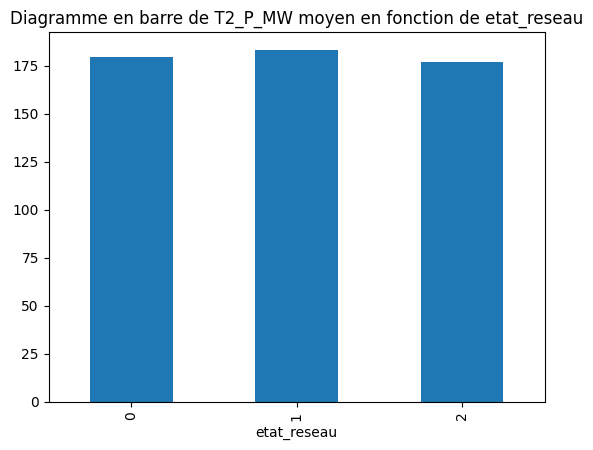

In [76]:
df.groupby('etat_reseau')['T2_P_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T2_P_MW moyen en fonction de etat_reseau')
plt.xlabel('etat_reseau')

In [77]:
df.groupby('etat_reseau')['T2_Q_MVAR'].describe()

count       mean        std    min      25%     50%      75%  \
etat_reseau                                                                  
0            1425.0  45.073207   9.873610  11.79  38.5900  44.950  51.4600   
1               8.0  40.568750   6.081967  29.15  39.2625  43.475  43.8725   
2               7.0  40.314286  14.236393  20.70  32.2000  39.760  46.0800   

               max  
etat_reseau         
0            78.78  
1            46.11  
2            65.18

Text(0.5, 0, 'etat_reseau')

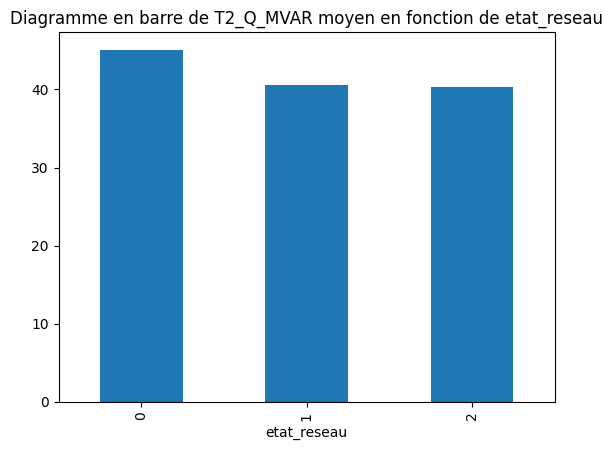

In [78]:
df.groupby('etat_reseau')['T2_Q_MVAR'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T2_Q_MVAR moyen en fonction de etat_reseau')
plt.xlabel('etat_reseau')

## Analyse:

La puissance r√©active moyenne diminue l√©g√®rement de l‚Äô√©tat 0 (‚âà45 MVAR) √† l‚Äô√©tat 2 (‚âà40 MVAR).
Mais les effectifs des √©tats 1 et 2 sont trop faibles pour conclure (8 et 7 points).

Conclusion : seule l‚Äôinfo sur l‚Äô√©tat 0 est fiable. Pas de tendance exploitable sans plus de donn√©es.

In [79]:
df.groupby('etat_reseau')['T2_I_A'].describe()

count        mean         std    min     25%     50%     75%  \
etat_reseau                                                                  
0            1425.0  478.368561   92.888147  220.2  415.80  470.60  532.40   
1               8.0  533.462500  105.966382  374.3  466.55  515.55  600.95   
2               7.0  534.528571   97.718485  386.1  465.90  546.50  615.10   

               max  
etat_reseau         
0            952.3  
1            703.5  
2            647.1

Text(0.5, 0, 'etat_reseau')

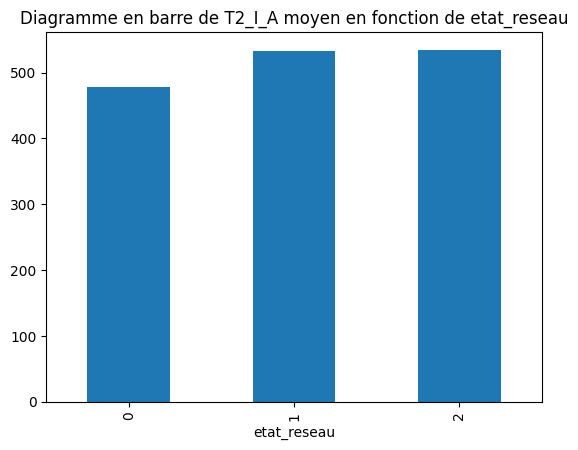

In [80]:
df.groupby('etat_reseau')['T2_I_A'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T2_I_A moyen en fonction de etat_reseau')
plt.xlabel('etat_reseau')

## Analyse globale etat_reseau avec les variables continues:

Toutes les m√©triques √©tudi√©es ‚Äî telles que consommation_MW, production_MW, T1_P_MW, T2_P_MW, T2_Q_MVAR, T2_I_A, Q_total_MVAR, S_total_MVA ‚Äî pr√©sentent des valeurs moyennes tr√®s similaires entre les diff√©rents √©tats du r√©seau (etat_reseau ‚àà {0, 1, 2}).

### zone_reseau /consommation_MW,  zone_reseau/production_MW,   zone_reseau/T1_P_MW,   zone_reseau/T2_P_MW,    zone_reseau/T2_Q_MVAR,    zone_reseau/T2_I_A,zone_reseau/Q_total_MVAR,    zone_reseau/S_total_MVA

In [81]:
df.groupby('zone_reseau')['consommation_MW'].describe()

count          mean          std      min       25%      50%  \
zone_reseau                                                                 
Centre       291.0  50154.659794  5921.450494  37231.0  44063.00  50558.0   
Est          306.0  50035.781046  5629.342108  42000.0  44060.50  50051.5   
Nord         252.0  49990.591270  5612.426749  40194.0  44665.75  49729.0   
Ouest        301.0  49580.478405  5772.854136  37264.0  43846.00  49371.0   
Sud          290.0  49823.300000  5898.095460  33322.0  44142.75  50121.5   

                  75%      max  
zone_reseau                     
Centre       56080.50  57999.0  
Est          55653.25  57999.0  
Nord         55335.00  57997.0  
Ouest        55356.00  57999.0  
Sud          55534.50  57999.0

Text(0.5, 0, 'zone_reseau')

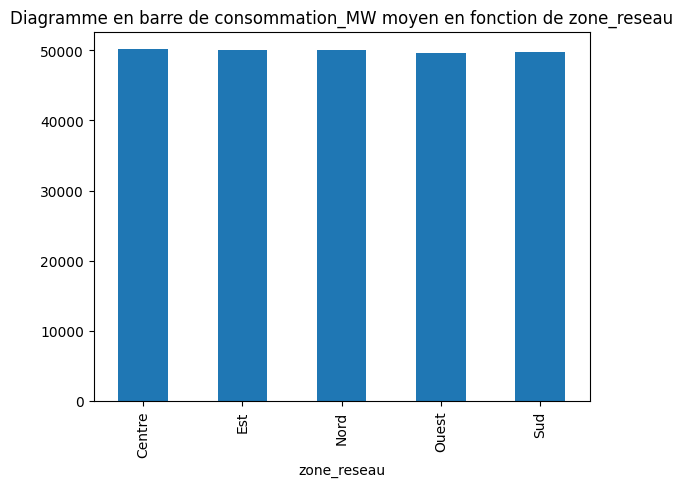

In [82]:
df.groupby('zone_reseau')['consommation_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de consommation_MW moyen en fonction de zone_reseau')
plt.xlabel('zone_reseau')

In [83]:
df.groupby('zone_reseau')['production_MW'].describe()

count          mean          std      min       25%      50%  \
zone_reseau                                                                 
Centre       291.0  50849.828179  5788.372798  42222.0  45107.00  51521.0   
Est          306.0  50549.722222  5633.442557  42113.0  44599.00  50540.0   
Nord         252.0  50604.761905  5548.926400  42452.0  45267.75  50298.0   
Ouest        301.0  50220.049834  5665.823299  42258.0  44522.00  50400.0   
Sud          290.0  50609.496552  5615.976355  42257.0  45054.25  50912.5   

                  75%      max  
zone_reseau                     
Centre       56598.50  58825.0  
Est          56062.50  58679.0  
Nord         56048.75  58823.0  
Ouest        55784.00  58730.0  
Sud          56014.75  58882.0

Text(0.5, 0, 'zone_reseau')

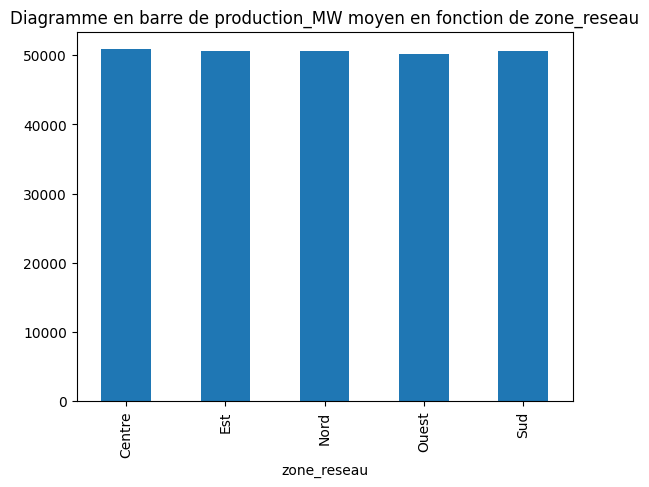

In [84]:
df.groupby('zone_reseau')['production_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de production_MW moyen en fonction de zone_reseau')
plt.xlabel('zone_reseau')

In [85]:
df.groupby('zone_reseau')['T1_P_MW'].describe()

count        mean        std     min       25%      50%  \
zone_reseau                                                            
Centre       291.0  198.510653  31.854188  113.01  176.1000  200.880   
Est          306.0  197.713431  30.436909  115.01  177.2300  198.645   
Nord         252.0  203.358452  30.835263  126.94  184.6850  202.800   
Ouest        301.0  199.306512  30.784571  124.33  175.8300  197.950   
Sud          290.0  195.846621  30.946603  121.46  176.9475  194.585   

                  75%     max  
zone_reseau                    
Centre       220.9150  280.01  
Est          215.6525  292.95  
Nord         224.6550  305.87  
Ouest        220.5300  288.06  
Sud          215.1100  284.73

Text(0.5, 0, 'zone_reseau')

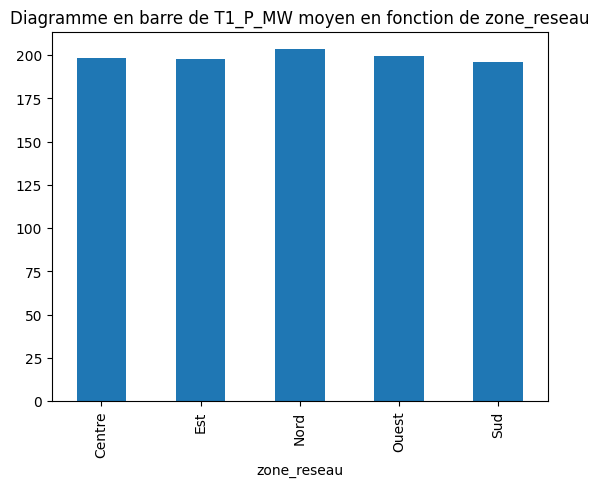

In [86]:
df.groupby('zone_reseau')['T1_P_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T1_P_MW moyen en fonction de zone_reseau')
plt.xlabel('zone_reseau')

In [87]:
df.groupby('zone_reseau')['T2_P_MW'].describe()

count        mean        std     min       25%     50%       75%  \
zone_reseau                                                                     
Centre       291.0  177.677801  24.414023  109.73  161.8300  177.97  193.7000   
Est          306.0  179.292157  22.688508  104.54  163.2750  177.17  195.8225   
Nord         252.0  179.842302  23.925400  117.72  163.1300  179.24  196.2825   
Ouest        301.0  181.151395  26.286806   95.61  163.8800  181.58  199.8300   
Sud          290.0  179.286897  23.998339   99.19  162.0275  179.98  195.9175   

                max  
zone_reseau          
Centre       245.81  
Est          244.32  
Nord         247.87  
Ouest        252.85  
Sud          234.28

Text(0.5, 0, 'zone_reseau')

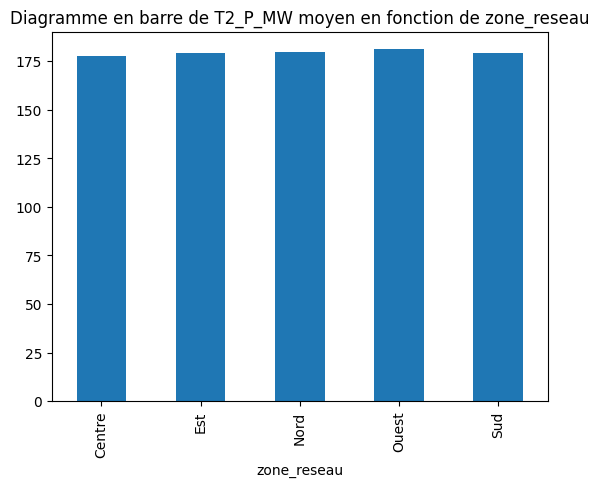

In [88]:
df.groupby('zone_reseau')['T2_P_MW'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T2_P_MW moyen en fonction de zone_reseau')
plt.xlabel('zone_reseau')

In [89]:
df.groupby('zone_reseau')['T2_Q_MVAR'].describe()

count       mean        std    min      25%     50%      75%  \
zone_reseau                                                                 
Centre       291.0  45.528969   9.444694  14.66  39.9350  45.130  51.7350   
Est          306.0  44.944510   9.542423  17.92  38.6200  44.925  51.0625   
Nord         252.0  44.047183  10.364235  15.91  36.9650  43.905  50.2725   
Ouest        301.0  45.764585   9.883533  17.00  39.0900  45.570  51.9100   
Sud          290.0  44.686517  10.221191  11.79  38.2025  44.290  51.5875   

               max  
zone_reseau         
Centre       78.78  
Est          77.88  
Nord         70.80  
Ouest        74.70  
Sud          77.84

Text(0.5, 0, 'zone_reseau')

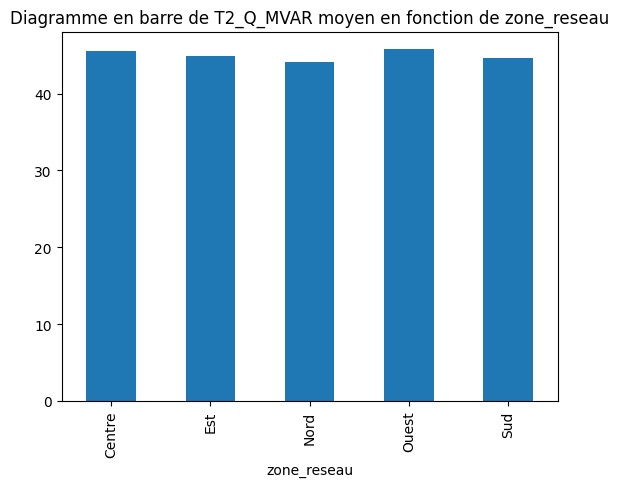

In [90]:
df.groupby('zone_reseau')['T2_Q_MVAR'].mean().plot(kind='bar')
plt.title('Diagramme en barre de T2_Q_MVAR moyen en fonction de zone_reseau')
plt.xlabel('zone_reseau')

In [91]:
df.groupby('zone_reseau')['Q_total_MVAR'].describe()

count         mean         std    min      25%     50%      75%  \
zone_reseau                                                                    
Centre       291.0  1994.512027  386.351139  828.0  1714.00  2017.0  2261.50   
Est          306.0  1957.578431  400.669541  803.0  1662.50  1949.0  2211.00   
Nord         252.0  1989.083333  419.242407  987.0  1694.50  1979.0  2232.50   
Ouest        301.0  2005.073090  403.678339  864.0  1758.00  2024.0  2272.00   
Sud          290.0  2015.327586  425.039456  918.0  1716.25  2013.5  2295.75   

                max  
zone_reseau          
Centre       2912.0  
Est          2928.0  
Nord         3570.0  
Ouest        3260.0  
Sud          3125.0

Text(0.5, 0, 'zone_reseau')

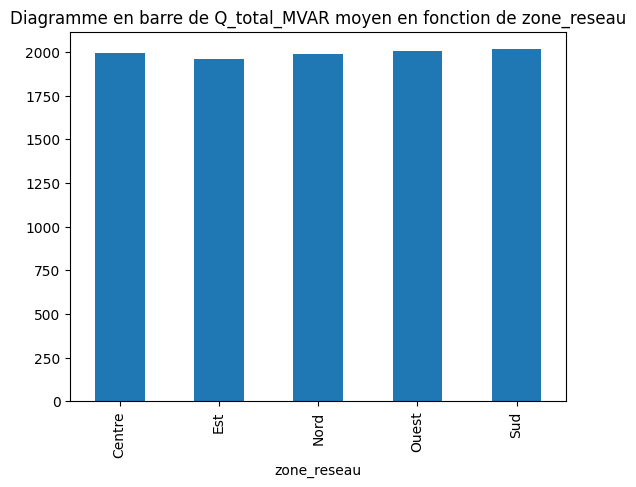

In [92]:
df.groupby('zone_reseau')['Q_total_MVAR'].mean().plot(kind='bar')
plt.title('Diagramme en barre de Q_total_MVAR moyen en fonction de zone_reseau')
plt.xlabel('zone_reseau')

In [93]:
df.groupby('zone_reseau')['S_total_MVA'].describe()

count          mean          std      min      25%      50%  \
zone_reseau                                                                
Centre       291.0  50196.463918  5916.168538  37276.0  44116.0  50603.0   
Est          306.0  50076.179739  5624.785022  42021.0  44104.5  50090.0   
Nord         252.0  50032.321429  5608.652898  40242.0  44731.0  49775.5   
Ouest        301.0  49623.295681  5767.189052  37320.0  43908.0  49440.0   
Sud          290.0  49866.417241  5893.308860  33396.0  44196.0  50156.0   

                  75%      max  
zone_reseau                     
Centre       56118.00  58036.0  
Est          55688.50  58042.0  
Nord         55392.00  58049.0  
Ouest        55390.00  58051.0  
Sud          55558.75  58052.0

Text(0.5, 0, 'zone_reseau')

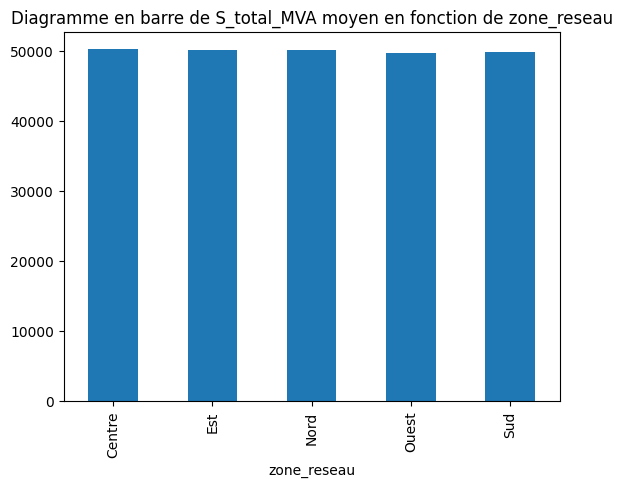

In [94]:
df.groupby('zone_reseau')['S_total_MVA'].mean().plot(kind='bar')
plt.title('Diagramme en barre de S_total_MVA moyen en fonction de zone_reseau')
plt.xlabel('zone_reseau')

### Analyse global entre zone reseau et les autres variables continues:

Les diff√©rentes courbes de moyennes par zone_reseau ‚Äî incluant la consommation (consommation_MW), la production (production_MW), les puissances actives (T1_P_MW, T2_P_MW), la puissance r√©active (T2_Q_MVAR, Q_total_MVAR), le courant (T2_I_A) et la puissance apparente (S_total_MVA) ‚Äî pr√©sentent une stabilit√© remarquable entre les zones : Centre, Est, Nord, Ouest, Sud.

Les √©carts sont faibles, traduisant un √©quilibrage homog√®ne du r√©seau √©lectrique en termes de charge et de transit √©lectrique. Cela sugg√®re que la r√©partition g√©ographique des usages, des productions, et des infrastructures est bien dimensionn√©e √† l‚Äô√©chelle nationale ou r√©gionale

## Pour voir √âvaluer si les variables √©lectriques varient significativement selon 3 facteurs structurels du r√©seau on fait un test de KRUSKAL WALIS ( car les classes sont desequilibrees)

In [95]:
from scipy.stats import kruskal

def run_kruskal_test(df, group_col, variables, alpha=0.05):
    results = []
    for var in variables:
        groups = [group[var].dropna() for _, group in df.groupby(group_col)]
        if all(len(g) > 0 for g in groups):
            stat, p_value = kruskal(*groups)
            hypothesis = f"H0: Il n'y a pas de diff√©rence significative de '{var}' selon '{group_col}'"
            interpretation = "Nous avons suffisamment d'√©vidences pour rejeter H0" if p_value < alpha else "Nous n'avons pas suffisamment d'√©vidences pour rejeter H0"
            results.append({
                "variable": var,
                "group_by": group_col,
                "statistic": stat,
                "p_value": p_value,
                "interpretation": interpretation
            })
    return pd.DataFrame(results)

# Exemple d'utilisation :
variables = [
    'T1_P_MW', 'T2_P_MW', 'T2_Q_MVAR',
    'T2_I_A', 'Q_total_MVAR', 'S_total_MVA',
    'consommation_MW', 'production_MW'
]

kruskal_results_etat = run_kruskal_test(df, 'etat_reseau', variables)
display(kruskal_results_etat)

kruskal_results_zone = run_kruskal_test(df, 'zone_reseau', variables)
display(kruskal_results_zone)

kruskal_results_cosphi = run_kruskal_test(df, 'cos_phi', variables)
display(kruskal_results_cosphi)


variable     group_by  statistic       p_value  \
0          T1_P_MW  etat_reseau   0.579312  7.485211e-01   
1          T2_P_MW  etat_reseau   0.327105  8.491219e-01   
2        T2_Q_MVAR  etat_reseau   3.557016  1.688899e-01   
3           T2_I_A  etat_reseau   4.633207  9.860792e-02   
4     Q_total_MVAR  etat_reseau   0.164335  9.211175e-01   
5      S_total_MVA  etat_reseau  38.497548  4.368816e-09   
6  consommation_MW  etat_reseau  38.506018  4.350353e-09   
7    production_MW  etat_reseau   1.105171  5.754600e-01   

                                      interpretation  
0  Nous n'avons pas suffisamment d'√©vidences pour...  
1  Nous n'avons pas suffisamment d'√©vidences pour...  
2  Nous n'avons pas suffisamment d'√©vidences pour...  
3  Nous n'avons pas suffisamment d'√©vidences pour...  
4  Nous n'avons pas suffisamment d'√©vidences pour...  
5  Nous avons suffisamment d'√©vidences pour rejet...  
6  Nous avons suffisamment d'√©vidences pour rejet...  
7  Nous n'avons pas suffisamment d'√©vidences pour...

variable     group_by  statistic   p_value  \
0          T1_P_MW  zone_reseau   8.983709  0.061508   
1          T2_P_MW  zone_reseau   3.002367  0.557429   
2        T2_Q_MVAR  zone_reseau   5.917984  0.205358   
3           T2_I_A  zone_reseau   3.186698  0.527082   
4     Q_total_MVAR  zone_reseau   4.234229  0.375233   
5      S_total_MVA  zone_reseau   1.346869  0.853375   
6  consommation_MW  zone_reseau   1.343638  0.853929   
7    production_MW  zone_reseau   1.807048  0.771193   

                                      interpretation  
0  Nous n'avons pas suffisamment d'√©vidences pour...  
1  Nous n'avons pas suffisamment d'√©vidences pour...  
2  Nous n'avons pas suffisamment d'√©vidences pour...  
3  Nous n'avons pas suffisamment d'√©vidences pour...  
4  Nous n'avons pas suffisamment d'√©vidences pour...  
5  Nous n'avons pas suffisamment d'√©vidences pour...  
6  Nous n'avons pas suffisamment d'√©vidences pour...  
7  Nous n'avons pas suffisamment d'√©vidences pour...

variable group_by   statistic        p_value  \
0          T1_P_MW  cos_phi    2.379590   6.663189e-01   
1          T2_P_MW  cos_phi    2.520585   6.409535e-01   
2        T2_Q_MVAR  cos_phi    2.737471   6.026738e-01   
3           T2_I_A  cos_phi    2.818921   5.885710e-01   
4     Q_total_MVAR  cos_phi  702.055614  1.250655e-150   
5      S_total_MVA  cos_phi  196.851936   1.785028e-41   
6  consommation_MW  cos_phi  201.394245   1.884100e-42   
7    production_MW  cos_phi  187.434016   1.886464e-39   

                                      interpretation  
0  Nous n'avons pas suffisamment d'√©vidences pour...  
1  Nous n'avons pas suffisamment d'√©vidences pour...  
2  Nous n'avons pas suffisamment d'√©vidences pour...  
3  Nous n'avons pas suffisamment d'√©vidences pour...  
4  Nous avons suffisamment d'√©vidences pour rejet...  
5  Nous avons suffisamment d'√©vidences pour rejet...  
6  Nous avons suffisamment d'√©vidences pour rejet...  
7  Nous avons suffisamment d'√©vidences pour rejet...